## **Dataset overview**

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from scipy.stats import shapiro
from scipy.stats import kruskal

In [ ]:
#list all the datasets in 'org_compliance_data.db'
conn = sqlite3.connect("org_compliance_data.db")   

tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

In [1125]:
# Connect to your database
conn = sqlite3.connect("org_compliance_data.db")

# List of tables
tables = ["departments", "high_risk_departments", "risk_summary_by_division", "data_dictionary"]

# Set display options to show all columns
pd.set_option('display.max_columns', None)     
pd.set_option('display.width', None)           
pd.set_option('display.max_colwidth', None)    

# Loop through tables and show first 5 rows
for table in tables:
    print(f"\n{'='*50}")
    print(f"Table: {table}")
    print("="*50)
    
    df = pd.read_sql_query(f"SELECT * FROM {table} LIMIT 6;", conn)
    display(df)   


Table: departments


,dept_id,dept_name,dept_category,division,dept_type,dept_age_years,location_type,team_size,reporting_structure,manager_experience_level,supervisor_experience_level,primary_function,secondary_function,creation_reason,oversight_body,reporting_lag_days,training_hours_quarterly,violations_past_3years,remediation_plan_active,executive_support,external_consulting,engagement_programs,onboarding_program,improvement_commitment,digital_systems,external_partnerships,interdept_collaboration_score,resource_availability_score,external_interactions_frequency,risk_exposure_operational,risk_exposure_financial,operational_health_index,reporting_gaps_annual,audit_score_q1,audit_score_q2,compliance_score_final,overall_risk_score
0,DEPT-1620,Core Compliance,Financial_Reporting,Corporate_HQ,Operations,8.0,Remote,Large,Centralized,2.0,2.0,Other,Other,Restructuring,Internal_Audit,1.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,3.0,2.0,3.0,1.0,NaN,5.0,NaN,55.0,55.0,65.0,12.0
1,DEPT-1133,Digital Governance,Financial_Reporting,Corporate_HQ,Compliance,8.0,Urban,Large,Centralized,2.0,2.0,Other,Administrative,Regulation,None,1.0,20.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0,4.0,NaN,2.0,2.0,1.0,26.0,NaN,40.0,NaN,43.0
2,DEPT-4917,Central Hub,Operational_Compliance,None,None,NaN,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DEPT-6959,Compliance - Legacy Region,Financial_Reporting,Corporate_HQ,Support,8.0,Urban,Large,Centralized,4.0,3.0,Other,Other,Regulation,Internal_Audit,1.0,60.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,4.0,1.0,1.0,5.0,2.0,70.0,75.0,85.0,11.0
4,DEPT-4312,West Internal Controls,Financial_Reporting,Corporate_HQ,Operations,6.0,Urban,Small,Centralized,1.0,NaN,Other,Other,Restructuring,Internal_Audit,2.0,40.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,4.0,2.0,1.0,1.0,5.0,2.0,45.0,45.0,45.0,11.0
5,DEPT-3347,Business Integrity - Central Region,Financial_Reporting,Corporate_HQ,Operations,6.0,Urban,Small,Centralized,2.0,1.0,Administrative,Other,Regulation,None,1.0,20.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,4.0,4.0,4.0,3.0,5.0,5.0,6.0,45.0,50.0,50.0,53.0



Table: high_risk_departments


,dept_id,dept_name,dept_category,division,dept_type,...,reporting_gaps_annual,audit_score_q1,audit_score_q2,compliance_score_final,overall_risk_score
0,DEPT-1133,Digital Governance,Financial_Reporting,Corporate_HQ,Compliance,...,26.0,NaN,40.0,NaN,43.0
1,DEPT-4312,West Internal Controls,Financial_Reporting,Corporate_HQ,Operations,...,2.0,45.0,45.0,45.0,11.0
2,DEPT-3347,Business Integrity - Central Region,Financial_Reporting,Corporate_HQ,Operations,...,6.0,45.0,50.0,50.0,53.0
3,DEPT-2554,Central Team,Financial_Reporting,Corporate_HQ,Support,...,0.0,65.0,60.0,65.0,40.0
4,DEPT-3151,Compliance - East Region,Financial_Reporting,Corporate_HQ,None,...,10.0,50.0,50.0,50.0,35.0
5,DEPT-3953,Compliance - Emerging Region,Financial_Reporting,Corporate_HQ,Support,...,6.0,65.0,55.0,55.0,18.0



Table: risk_summary_by_division


,division,avg_compliance_score,std_compliance_score,min_compliance_score,max_compliance_score,total_violations,avg_risk_score,dept_count
0,Corporate_HQ,63.245477,13.369017,0.0,95.0,122.0,24.463636,428
1,Regional_Operations,76.054167,13.777896,50.8,100.0,55.0,64.000000,27



Table: data_dictionary


,table_name,field_name,data_type,description
0,departments,dept_id,string,Unique department identifier
1,departments,dept_name,string,Department name
2,departments,dept_category,string,"Primary compliance category (Financial_Reporting, Operational_Compliance, Risk_Management)"
3,departments,division,string,"Organizational division (Corporate_HQ, Regional_Operations)"
4,departments,dept_type,string,"Department type (Operations, Support, Compliance, Finance, Technology, Legal)"
5,departments,dept_age_years,integer,Age of department in years since establishment


---
>##### We can see that there are 4 tables:
>
>- `departments` (the main table describing departments)
>
>- `high_risk_departments` (subset of the 'departments' table describing only risky departments)
>
>- `risk_summary_by_division` (shows information about divisions, and divisions contain departments)
>
>- `data_dictionary` (explains variables)
>
>  Since we want to explore all the variables, we want to see the full dictionary table:
---

In [1128]:
#full data_dictionary table
df_dict = pd.read_sql_query("SELECT * FROM data_dictionary;", conn)

pd.set_option('display.max_columns', None)     
pd.set_option('display.max_rows', None)       
pd.set_option('display.width', None)           
pd.set_option('display.max_colwidth', None)    

display(df_dict)

,table_name,field_name,data_type,description
0,departments,dept_id,string,Unique department identifier
1,departments,dept_name,string,Department name
2,departments,dept_category,string,"Primary compliance category (Financial_Reporting, Operational_Compliance, Risk_Management)"
3,departments,division,string,"Organizational division (Corporate_HQ, Regional_Operations)"
4,departments,dept_type,string,"Department type (Operations, Support, Compliance, Finance, Technology, Legal)"
5,departments,dept_age_years,integer,Age of department in years since establishment
6,departments,location_type,string,"Geographic location type (Urban, Remote, Suburban, International)"
7,departments,team_size,string,"Team size category (Small, Medium, Large)"
8,departments,reporting_structure,string,"Reporting hierarchy (Centralized, Autonomous, Hybrid)"
9,departments,manager_experience_level,integer,Manager experience level (0=none to 4=extensive)


---
>#### From the dictionary we can see:
>
>There are variables that help us identify departments:
>- `dept_id`
>- `dept_name`
>- `dept_category`: In this project our main character will be compliance. Compliance = the rules are followed. Non-compliance = the rules are not followed. What rules? Rules can be different and they are set by the company we are doing the project for. We don't know them. But we know the groups of these topics (from dept_categpry): Financial_Reporting, Operational_Compliance, Risk_Management. This means that workers in some departments deal each with one of these three groups of rules. So potentially, it can be harder to deal with one of the groups than with the others, so the non-compliance level for these departments can be higher.
>- `division`: departments belong to either of two divisions
>- `dept_type`: what the department does in general: Operations, Support, Compliance, Finance, Technology, Legal. Again, potentially, it can be more difficult to follow rules when dealing with, for example, operations so the non-compliance level will be higher for these departments.
>
>Variables that give us understanding of structure and context of the departments:
>
>- `dept_age_years`
>- `location_type`
>- `team_size`
>- `reporting_structure`: how compliance reports are organized (Centralized, Autonomous, Hybrid)
>- `manager_experience_level`
>- `supervisor_experience_level`
>- `primary_function`: what exactly the department does (IT support, Audit, Reporting, etc) first
>- `secondary_function`what the department does after the primary_function
>- `creation_reason`: why the department was created
>- `oversight_body`: who monitors the department(Internal_Audit, External_Auditor, Compliance_Officer, Board_Committee) - who checks that the rules are followed
>
>Variables that give us information on how the compliance is being treated:
>
>- `reporting_lag_days`: average delay in compliance report, so high level may be correlated with non-compliance
>- `training_hours_quarterly`: how much compliance training (in hours) the department received
>- `violations_past_3years`: direct indicator of past violations in the department
>- `remediation_plan_active`: shows if there is an active plan to fix compliance issues.
>- `executive_support`
>- `external_consulting`
>- `engagement_programs`: whether there are active employee engagement programs
>- `onboarding_program` the department has a structured onboarding program for new employees about compliance rules
>- `improvement_commitment`
>- `digital_systems`: whether the department uses software/tools to manage compliance
>- `external_partnerships`: whether the department collaborates with external entities for compliance (like hiring external consultants)
>
>'Soft' indexes, like soft skills of departments:
>
>- `interdept_collaboration_score`: does this department collaborate with other departments?
>- `resource_availability_score`: how well it collaborates with other departments
>- `external_interactions_frequency`: how often the department interacts with external stakeholders (Frequent interactions may improve compliance awareness, but increase exposure if mismanaged)
>
> Risk and health:
>- `risk_exposure_operational`: how likely an operational miskate or failure can happen. For example, is the operation of this department is mostly manual then the likelihood of a mistake is higher than for departments with automated work.
>- `risk_exposure_financial`: potential financial impact of the department's actions. Finance department->5, IT->1
>- `operational_health_index`: how well the department runs its processes
>- `reporting_gaps_annual`: missed or incomplete reports per year
>- `audit_score_q1`: how well the department passes the Q1 audit
>- `audit_score_q2`: how well the department passes the Q2 audit
>- `compliance_score_final`: Overall compliance rating for the year. PRIMARY TARGET
>- `overall_risk_score`: Weighted score combining operational, financial, and other risk factors.
---
> There are many variables that could possibly affect the non-compliance. But what is non-compliance? As the dictionary table explains, there already exist two main scores assosiated with compliance and overall risk: compliance_score and the overall_risk_score. What is the difference between them?
> 
> Hypothesis: `compliance_score` is the overall compliance rating, so the compliance was already measures for the chosen department. `overall_risk_score` includes risks, but not only for non-compliance. Possibly also financial risk, operatrional risk, etc.
>
> We will find the exact correlations later in the EDA.
---

## **EDA**

---
> **We have three tables**
> 
> 1) The main table for us is the `departments` table.
> 2) The `high_risk_departments` table contains departments already selected as high risky. Possibly, not only because of the overall_risk_score. So if we understand why, by comparing these values to the values of other, not risky departments, we can find the difference and what makes departments risky.
> 3) The `risk_summary_by_division` table gives us information not about departments' but about divisions' risk summary. So it operates on the higher level summarizing the contribute of all departments belonging to the particular division. We can use it to compare divisions and say:if a department belongs to one division, it is potentially in righer risk.
> 4) Risk of what? Not only non-compliance but the overall risk. So we need to distinct the compliance part from the overall risk as our primary goal to detect non-compliance and predict.
---

### ***1.1 Shape***

#### **Shape:** Overview

In [1135]:
import sqlite3
import pandas as pd

#conn = sqlite3.connect("your_database.db")   # ← change file name if needed

departments = pd.read_sql_query("SELECT * FROM departments;", conn)

print("'departments' table shape:", departments.shape)

'departments' table shape: (709, 37)


In [1136]:
print("\nColumn types:\n", departments.dtypes)


Column types:
 dept_id                             object
dept_name                           object
dept_category                       object
division                            object
dept_type                           object
dept_age_years                     float64
location_type                       object
team_size                           object
reporting_structure                 object
manager_experience_level           float64
supervisor_experience_level        float64
primary_function                    object
secondary_function                  object
creation_reason                     object
oversight_body                      object
reporting_lag_days                 float64
training_hours_quarterly           float64
violations_past_3years             float64
remediation_plan_active            float64
executive_support                  float64
external_consulting                float64
engagement_programs                float64
onboarding_program                 flo

#### **Shape:** Conclusion

---
>We see that in `departments` we have variables of two types: numeric (float64) and categorical(object).
>
>For categorical we can do groupings, counts, bar plots, or encoding for modeling.
>
>For numeric we can do statistical analysis, correlations, scatterplots.
---

### ***1.2 Missing Values***

#### **Missing Values:** Overview

In [1143]:
# Count missing values per column
missing_counts = departments.isnull().sum()
missing_percent = (missing_counts / len(departments) * 100).round(2)

missing_summary = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_percent': missing_percent
}).sort_values(by='missing_percent', ascending=False)

display(missing_summary)

,missing_count,missing_percent
digital_systems,304,42.88
external_interactions_frequency,303,42.74
interdept_collaboration_score,303,42.74
oversight_body,303,42.74
violations_past_3years,303,42.74
onboarding_program,302,42.60
overall_risk_score,300,42.31
training_hours_quarterly,300,42.31
team_size,300,42.31
external_partnerships,300,42.31


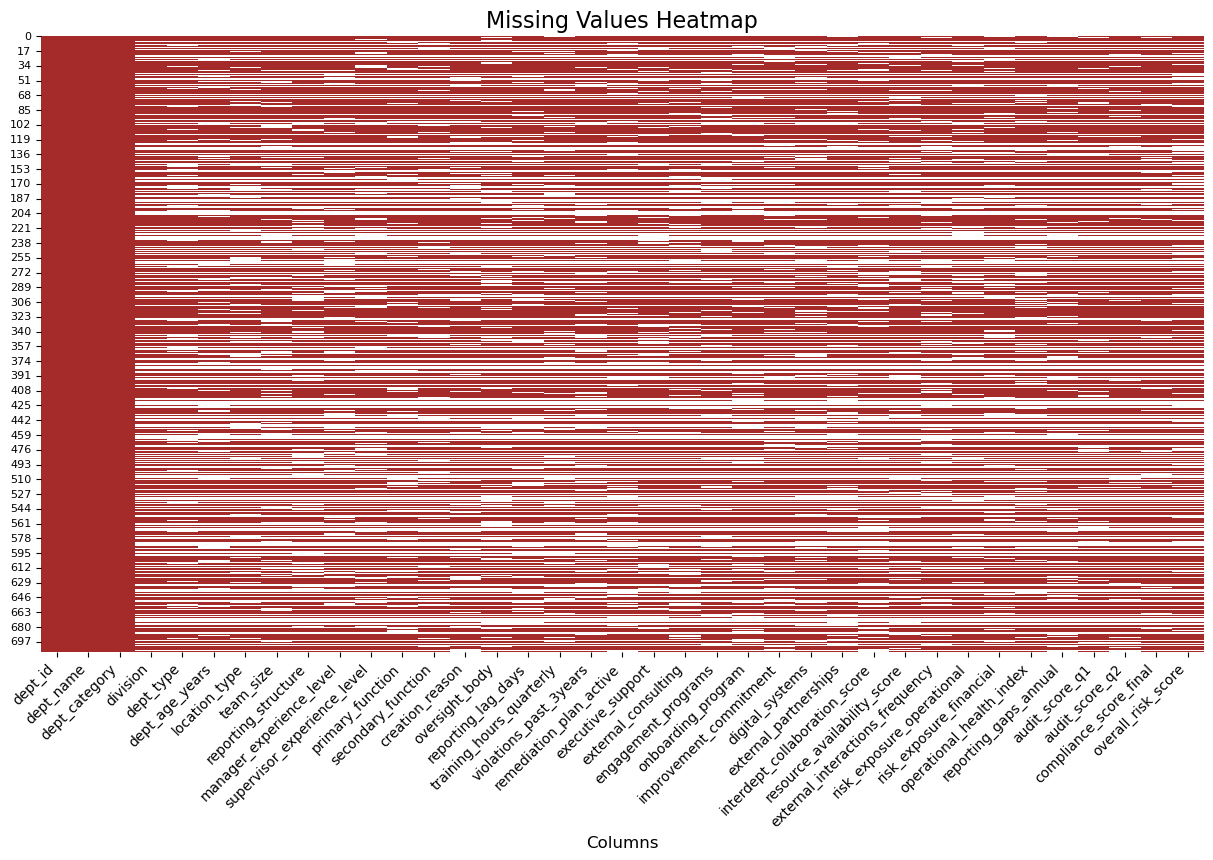

In [1145]:
plt.figure(figsize=(15,8))
sns.heatmap(
    departments.isnull(), 
    cbar=False, 
    cmap=sns.color_palette(["brown", "white"])
)
plt.title('Missing Values Heatmap', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=8)

plt.show()

---
> In `departments` there is substantial missing data in the dataset (around 35–42% per column).
>
> However, our key categorical identifier variables — dept_id, dept_name, and dept_category — contain no missing values.
>
> Because these columns are complete, we can reliably group the dataset by these identifiers to examine whether the missingness in other variables is associated with specific departments or department categories to see if missing data is random or systematically related to certain groups of observations.
---

#### **Missing Values:** Missingness by dept_category

In [1148]:
missing_by_category = departments.groupby('dept_category').apply(
    lambda x: x.isnull().sum(),
    include_groups=False
)
display(missing_by_category)

grouped = departments.groupby('dept_category', dropna=False)
total_cells = grouped.size() * departments.shape[1]
missing_cells = grouped.apply(lambda g: g.isna().sum().sum(), include_groups=False)
missing_rate = (missing_cells / total_cells) * 100

print("--- Overall Data Integrity Rate by Category ---")
print(missing_rate.round(2))

,dept_id,dept_name,division,dept_type,dept_age_years,location_type,team_size,reporting_structure,manager_experience_level,supervisor_experience_level,primary_function,secondary_function,creation_reason,oversight_body,reporting_lag_days,training_hours_quarterly,violations_past_3years,remediation_plan_active,executive_support,external_consulting,engagement_programs,onboarding_program,improvement_commitment,digital_systems,external_partnerships,interdept_collaboration_score,resource_availability_score,external_interactions_frequency,risk_exposure_operational,risk_exposure_financial,operational_health_index,reporting_gaps_annual,audit_score_q1,audit_score_q2,compliance_score_final,overall_risk_score
dept_category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Financial_Reporting,0,0,0,37,39,39,42,40,39,45,34,39,40,46,42,42,47,42,41,39,41,47,38,44,41,45,40,48,34,39,41,40,21,18,17,42
Operational_Compliance,0,0,254,255,254,255,256,255,255,254,256,254,254,254,254,255,255,254,254,254,257,255,254,255,257,255,255,254,256,255,256,255,256,254,255,254
Risk_Management,0,0,0,4,5,5,2,1,2,1,3,1,3,3,1,3,1,2,1,2,1,0,0,5,2,3,4,1,3,5,1,2,2,2,4,4


--- Overall Data Integrity Rate by Category ---
dept_category
Financial_Reporting        8.31
Operational_Compliance    88.04
Risk_Management            8.90
dtype: float64


---
>Here we see a pattern: most data is missing for 'Operational_Compliance'. Then data is almost equally missing for 'Financial_Reporting' and 'Risk_Management' category. These are the categories of rules that departments have to deal with. Therefore, when departments deal with 'Operational_Compliance' rules, the data becomes missing. Why? What is the correlation between the data being missing and this type of rules?
>
>We will find the answer later in the next section.
---

#### **Missing Values:** Missingness by division

---
> 'division' has the least percent of missing values (35.83) out of all columns with missing values, therefore, we can check the missingness by division too.
---

In [1154]:
# Columns to exclude
exclude_cols = ['dept_id', 'dept_name', 'dept_category']

# Only analytical columns
analytic_cols = departments.columns.difference(exclude_cols)

# Missing values by division (only analytical columns)
missing_by_division = departments.groupby('division')[analytic_cols].apply(lambda x: x.isna().sum())
display(missing_by_division)

# Total number of cells per division (for analytical columns only)
grouped_data = departments.groupby('division', dropna=False)
total_cells_per_division = grouped_data.size() * len(analytic_cols)

# Total missing cells per division (analytical columns only)
total_missing_per_division = grouped_data[analytic_cols].apply(lambda x: x.isna().sum().sum())

# Missing rate per division (%)
overall_missing_rate = (total_missing_per_division / total_cells_per_division) * 100

print("--- Overall Data Integrity Rate by Division  ---")
final_rates = overall_missing_rate.round(2)
display(final_rates)

,audit_score_q1,audit_score_q2,compliance_score_final,creation_reason,dept_age_years,dept_type,digital_systems,division,engagement_programs,executive_support,external_consulting,external_interactions_frequency,external_partnerships,improvement_commitment,interdept_collaboration_score,location_type,manager_experience_level,onboarding_program,operational_health_index,overall_risk_score,oversight_body,primary_function,remediation_plan_active,reporting_gaps_annual,reporting_lag_days,reporting_structure,resource_availability_score,risk_exposure_financial,risk_exposure_operational,secondary_function,supervisor_experience_level,team_size,training_hours_quarterly,violations_past_3years
division,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Corporate_HQ,22,17,19,42,40,38,46,0,44,42,39,47,45,36,46,40,41,46,43,43,47,33,42,39,42,38,42,39,36,38,44,44,43,46
Regional_Operations,3,3,3,1,4,4,4,0,1,0,2,2,1,2,3,5,1,2,1,3,2,6,2,4,1,4,3,6,3,2,2,2,3,3


--- Overall Data Integrity Rate by Division  ---


division
Corporate_HQ             9.00
Regional_Operations      9.59
NaN                    100.00
dtype: float64

---
> Here we see another pattern: 'Corporate_HQ' division, according to the first table, misses far more values than Regional_Operations. However, it is an illusion arising from the fact that a lot of departments (428) belong to the Corpoprate_HQ and only 27 departments belong to the Regional Operations division. In fact, the percentage of missing values in these two divisions is almost the same (around 9%).
>
> What's more interesting, the missing division information (NaN) has an extremely high percent of missing data (100%). This is the strong proof that if the division information is missing -> everything else (exept for the 'dept_id', 'dept_name', 'dept_category') is missing. Therefore, these rows, where division is missing, are useless:
>- non-usable for modeling
>- non-recoverable (too much missing data)
> 
> Therefore, we can drop them.
> But before, we want to find out another interesting detail: do all missing rows belong to the Operational_Compliance category?
---

In [1157]:
# Rows where division is missing
missing_division_rows = departments[departments['division'].isna()]

# Total number of rows with missing division
total_missing_division = missing_division_rows.shape[0]

# Number of rows with missing division that belong to Operational_Compliance
missing_div_opcompliance = (missing_division_rows['dept_category'] == 'Operational_Compliance').sum()

print(f"Total rows with missing division: {total_missing_division}")
print(f"Rows with missing division and category 'Operational_Compliance': {missing_div_opcompliance}")

Total rows with missing division: 254
Rows with missing division and category 'Operational_Compliance': 254


---
> The hypothesis is confirmed: there is a perfect overlap: missing division -> missing data -> Operational_Compliance category.
>
> But are there any departments which deal with Operational_Compliance rules which actually submitted their data?
---

In [1160]:
# Exclude the constant columns
exclude_cols = ['dept_id', 'dept_name', 'dept_category', 'division']
analytic_cols = departments.columns.difference(exclude_cols)

# Mask for Operational_Compliance category
mask_op_compliance = departments['dept_category'] == 'Operational_Compliance'

# Check rows with at least one non-missing value in analytical columns
op_compliance_not_missing = departments.loc[mask_op_compliance, analytic_cols].dropna(how='all')

print(f"Number of Operational_Compliance rows with at least some data: {op_compliance_not_missing.shape[0]}")

Number of Operational_Compliance rows with at least some data: 12


---
> Yes, there are 12 such departments. So the question now is: Why did these 12 departments manage to submit their data while the others did not?
>
> Unfortunately, we cannot answer this question with the current dataset. Even if we analyze these 12 departments, we cannot compare them to the departments with missing values, because all the analytical columns are missing for the others. Only the dept_id and dept_name are present, but these do not provide any meaningful information for analysis.
>
> We have the last thing to check before we drop these departments with missing values: Does any of them belong to the table 'high_risk_departments'? This is meaningful, because the table 'high_risk_departments' shows departments already marked as risky and if any of the departments that we are going to drop will appear in this table, we can lose an important detail in analysing what makes departments risky. Maybe lack of values makes departments risky - we don't know yet.
---

In [1163]:
# Select departments with missing division
missing_division_rows = departments[departments['division'].isna()]
high_risk_departments = pd.read_sql_query("SELECT * FROM high_risk_departments;", conn)

# Find which of these departments are in high_risk_departments
matching_high_risk = high_risk_departments[
    high_risk_departments['dept_id'].isin(missing_division_rows['dept_id'])
]

# Display the departments as they are in the departments table
if not matching_high_risk.empty:
    print("Departments with missing division in the departments table:")
    display(missing_division_rows[
        missing_division_rows['dept_id'].isin(matching_high_risk['dept_id'])
    ])

    print("Same departments in the high_risk_departments table:")
    display(matching_high_risk)
else:
    print("No departments with missing division are in high_risk_departments.")

Departments with missing division in the departments table:


,dept_id,dept_name,dept_category,division,dept_type,dept_age_years,location_type,team_size,reporting_structure,manager_experience_level,supervisor_experience_level,primary_function,secondary_function,creation_reason,oversight_body,reporting_lag_days,training_hours_quarterly,violations_past_3years,remediation_plan_active,executive_support,external_consulting,engagement_programs,onboarding_program,improvement_commitment,digital_systems,external_partnerships,interdept_collaboration_score,resource_availability_score,external_interactions_frequency,risk_exposure_operational,risk_exposure_financial,operational_health_index,reporting_gaps_annual,audit_score_q1,audit_score_q2,compliance_score_final,overall_risk_score
154,DEPT-5023,Legacy Branch,Operational_Compliance,None,None,NaN,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,DEPT-2377,South Financial Controls,Operational_Compliance,None,None,NaN,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,DEPT-6883,Elite Hub,Operational_Compliance,None,None,NaN,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,DEPT-7646,Prime Regulatory Affairs,Operational_Compliance,None,None,NaN,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,DEPT-8429,East Group,Operational_Compliance,None,None,NaN,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
531,DEPT-9694,Governance - North Region,Operational_Compliance,None,None,NaN,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
660,DEPT-9204,Prime Governance,Operational_Compliance,None,None,NaN,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
707,DEPT-8168,Digital Compliance,Operational_Compliance,None,None,NaN,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Same departments in the high_risk_departments table:


,dept_id,dept_name,dept_category,division,dept_type,...,reporting_gaps_annual,audit_score_q1,audit_score_q2,compliance_score_final,overall_risk_score
22,DEPT-9694,Business Integrity - Innovation Region,Risk_Management,Corporate_HQ,Compliance,...,6.0,79.1,86.5,88.0,58.0
24,DEPT-8429,Legacy Department,Financial_Reporting,Corporate_HQ,None,...,0.0,55.0,60.0,55.0,NaN
37,DEPT-6883,Regulatory Affairs - Strategic Region,Risk_Management,Corporate_HQ,Operations,...,14.0,77.6,79.5,79.8,67.0
50,DEPT-5023,Central Division,Financial_Reporting,Corporate_HQ,Support,...,0.0,50.0,50.0,80.0,50.0
55,DEPT-7646,Regulatory Affairs - East Region,Financial_Reporting,Corporate_HQ,Operations,...,4.0,55.0,50.0,55.0,52.0
58,DEPT-2377,Prime Services,Financial_Reporting,Corporate_HQ,None,...,6.0,45.0,45.0,50.0,43.0
59,DEPT-9204,Innovation Financial Controls,Financial_Reporting,Regional_Operations,Support,...,16.0,75.8,81.4,82.5,98.0
139,DEPT-8168,Global Process Excellence,Financial_Reporting,Corporate_HQ,Support,...,4.0,55.0,55.0,55.0,32.0


---
> This comparison provided us with a few great insights:
> 1) We cannot drop the rows with missing division information since a few of them were already concidered risky.
> 2) Only the dept_id is a reliable reference since any other data can be changed due to unknown for us reasons. Perhaps a part of the previous data analysis.
> 3) The high_risk_departments table is not a simple subset or imputed version of departments. It’s a curated table, where missing data was handled probably by **manual categorization or external sources** rather than statistical imputation.
> 4) For now we can drop at least the dept_name.
---

#### **Missing Values:** Correlation between missing values and compliance or risk

---
> The last thing about missing values we need to find before moving on to handling them: Is there any correlation between the missing values and the compliance or risk? Because if there is, then something about the missing data can affect the compliance or risk and we want to know what before handling missing values. Perhaps the number of missing values negatively correlates with the compliance and positively correlates with risk.
---

In [1168]:
exclude_cols = ['dept_id', 'dept_name', 'dept_category', 'division']
analytic_cols = departments.columns.difference(exclude_cols)

# Fraction of missing values per row
row_missing_rate = departments[analytic_cols].isna().mean(axis=1)

compliance_col = 'compliance_score_final'
risk_col = 'overall_risk_score'

correlation_compliance = row_missing_rate.corr(departments[compliance_col])
correlation_risk = row_missing_rate.corr(departments[risk_col])

print(f"Correlation between missingness and compliance_score:final: {correlation_compliance:.3f}")
print(f"Correlation between missingness and overall_risk_score: {correlation_risk:.3f}")

Correlation between missingness and compliance_score:final: 0.033
Correlation between missingness and overall_risk_score: 0.006


> Correlation with compliance (0.033) → very low, meaning the amount of missing data does not systematically affect compliance scores.
>
> Correlation with risk (0.006) → essentially zero, so missing data is not predictive of risk either.
>
> In other words, based on this dataset:
>- Departments with more missing values are not inherently riskier.
>- Missingness seems to be mostly structural (like Operational_Compliance departments not submitting data), not related to the outcome variables.

#### **Missing Values:** other tables

> So far we analysed missing values in the `departments` table. Now we can look at two other improtant tables: `high_risk_departments` and `risk_summary_by_departments`

**high_risk_departments:** overview

In [1174]:
num_rows, num_columns = high_risk_departments.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 201
Number of columns: 37


In [1176]:
# Missing values per column
missing_high_risk = high_risk_departments.isna().sum()

# Missing percentage
missing_high_risk_percent = (missing_high_risk / high_risk_departments.shape[0]) * 100

# Create DataFrame
missing_df = pd.DataFrame({
    'missing_count': missing_high_risk, 
    'missing_percent': missing_high_risk_percent
}).sort_values('missing_percent', ascending=False)

display(missing_df)

,missing_count,missing_percent
dept_age_years,28,13.930348
violations_past_3years,28,13.930348
oversight_body,25,12.437811
digital_systems,23,11.442786
external_interactions_frequency,22,10.945274
team_size,22,10.945274
onboarding_program,22,10.945274
training_hours_quarterly,21,10.447761
interdept_collaboration_score,21,10.447761
dept_type,21,10.447761


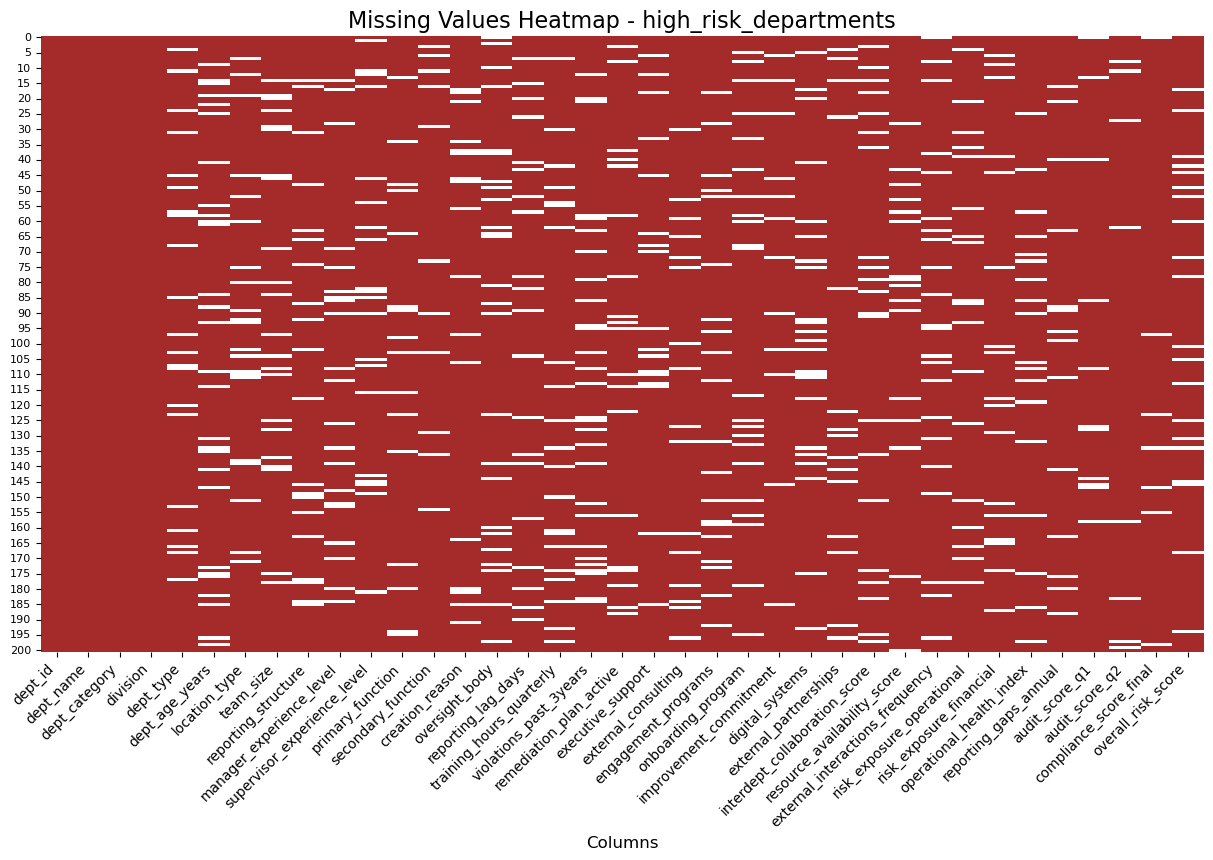

In [1178]:
plt.figure(figsize=(15, 8))
sns.heatmap(
    high_risk_departments.isnull(), 
    cbar=False, 
    cmap=sns.color_palette(["brown", "white"])
)
plt.title(f'Missing Values Heatmap - high_risk_departments', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=8)

plt.show()

---
> This table was already cleaned, there is much less missing data (around 10-14%). To see how exactley it was cleaned, we can compare departments from the high_risk_department table with the same departments from the departments table.
---

In [1180]:
# Merge departments with high_risk_departments on dept_id, keeping both versions
comparison_table = pd.merge(
    departments, 
    high_risk_departments, 
    on='dept_id', 
    how='inner', 
    suffixes=('_orig', '_highrisk')
)

# Display the new comparison table
comparison_table.head()

,dept_id,dept_name_orig,dept_category_orig,division_orig,dept_type_orig,dept_age_years_orig,location_type_orig,team_size_orig,reporting_structure_orig,manager_experience_level_orig,supervisor_experience_level_orig,primary_function_orig,secondary_function_orig,creation_reason_orig,oversight_body_orig,reporting_lag_days_orig,training_hours_quarterly_orig,violations_past_3years_orig,remediation_plan_active_orig,executive_support_orig,external_consulting_orig,engagement_programs_orig,onboarding_program_orig,improvement_commitment_orig,digital_systems_orig,external_partnerships_orig,interdept_collaboration_score_orig,resource_availability_score_orig,external_interactions_frequency_orig,risk_exposure_operational_orig,risk_exposure_financial_orig,operational_health_index_orig,reporting_gaps_annual_orig,audit_score_q1_orig,audit_score_q2_orig,compliance_score_final_orig,overall_risk_score_orig,dept_name_highrisk,dept_category_highrisk,division_highrisk,dept_type_highrisk,dept_age_years_highrisk,location_type_highrisk,team_size_highrisk,reporting_structure_highrisk,manager_experience_level_highrisk,supervisor_experience_level_highrisk,primary_function_highrisk,secondary_function_highrisk,creation_reason_highrisk,oversight_body_highrisk,reporting_lag_days_highrisk,training_hours_quarterly_highrisk,violations_past_3years_highrisk,remediation_plan_active_highrisk,executive_support_highrisk,external_consulting_highrisk,engagement_programs_highrisk,onboarding_program_highrisk,improvement_commitment_highrisk,digital_systems_highrisk,external_partnerships_highrisk,interdept_collaboration_score_highrisk,resource_availability_score_highrisk,external_interactions_frequency_highrisk,risk_exposure_operational_highrisk,risk_exposure_financial_highrisk,operational_health_index_highrisk,reporting_gaps_annual_highrisk,audit_score_q1_highrisk,audit_score_q2_highrisk,compliance_score_final_highrisk,overall_risk_score_highrisk
0,DEPT-1133,Digital Governance,Financial_Reporting,Corporate_HQ,Compliance,8.0,Urban,Large,Centralized,2.0,2.0,Other,Administrative,Regulation,None,1.0,20.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0,4.0,NaN,2.0,2.0,1.0,26.0,NaN,40.0,NaN,43.0,Digital Governance,Financial_Reporting,Corporate_HQ,Compliance,8.0,Urban,Large,Centralized,2.0,2.0,Other,Administrative,Regulation,None,1.0,20.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0,4.0,NaN,2.0,2.0,1.0,26.0,NaN,40.0,NaN,43.0
1,DEPT-4312,West Internal Controls,Financial_Reporting,Corporate_HQ,Operations,6.0,Urban,Small,Centralized,1.0,NaN,Other,Other,Restructuring,Internal_Audit,2.0,40.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,4.0,2.0,1.0,1.0,5.0,2.0,45.0,45.0,45.0,11.0,West Internal Controls,Financial_Reporting,Corporate_HQ,Operations,6.0,Urban,Small,Centralized,1.0,NaN,Other,Other,Restructuring,Internal_Audit,2.0,40.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,4.0,2.0,1.0,1.0,5.0,2.0,45.0,45.0,45.0,11.0
2,DEPT-3347,Business Integrity - Central Region,Financial_Reporting,Corporate_HQ,Operations,6.0,Urban,Small,Centralized,2.0,1.0,Administrative,Other,Regulation,None,1.0,20.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,4.0,4.0,4.0,3.0,5.0,5.0,6.0,45.0,50.0,50.0,53.0,Business Integrity - Central Region,Financial_Reporting,Corporate_HQ,Operations,6.0,Urban,Small,Centralized,2.0,1.0,Administrative,Other,Regulation,None,1.0,20.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,4.0,4.0,4.0,3.0,5.0,5.0,6.0,45.0,50.0,50.0,53.0
3,DEPT-2554,Central Team,Financial_Reporting,Corporate_HQ,Support,5.0,Urban,Small,Autonomous,3.0,3.0,Other,None,Merger,Internal_Audit,1.0,20.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,3.0,4.0,4.0,4.0,1.0,0.0,65.0,60.0,65.0,40.0,Central Team,Financial_Reporting,Corporate_HQ,Support,5.0,Urban,Small,Autonomous,3.0,3.0,Other,None,Merger,Internal_Audit,1.0,20.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,3.0,4.0,4.0,4.0,1.0,0.0,65.0,60.0,65.0,40.0
4,DEPT-3151,Compliance - East Region,Financial_Reporting,Corporate_HQ,None,8.0,Urban,Small,Centralized,3.0,3.0,Operations,Finance,Restructuring,External_Auditor,1.0,40

In [1181]:
comparison_results = {}

# Only compare analytical/important columns (exclude dept_id, dept_name, dept_category, division)
cols_to_check = [col for col in departments.columns if col not in ['dept_id', 'dept_name', 'dept_category', 'division']]

for col in cols_to_check:
    orig = comparison_table[f"{col}_orig"]
    clean = comparison_table[f"{col}_highrisk"]
    
    imputed = ((orig.isna()) & (~clean.isna())).sum()       # NaN -> value
    untouched = ((orig.isna()) & (clean.isna())).sum()      # NaN -> NaN
    unchanged = ((~orig.isna()) & (~clean.isna()) & (orig == clean)).sum()  # value -> same value
    changed = ((~orig.isna()) & (~clean.isna()) & (orig != clean)).sum()    # value -> changed value
    
    comparison_results[col] = {
        'imputed_count': imputed,
        'untouched_count': untouched,
        'unchanged_count': unchanged,
        'changed_count': changed
    }

# Convert to DataFrame for display
comparison_df = pd.DataFrame(comparison_results).T
comparison_df = comparison_df.sort_values('imputed_count', ascending=False)
display(comparison_df)

,imputed_count,untouched_count,unchanged_count,changed_count
reporting_structure,10,20,182,5
secondary_function,10,11,193,5
reporting_gaps_annual,10,14,189,6
external_consulting,9,17,190,2
location_type,9,22,184,2
compliance_score_final,9,7,194,9
audit_score_q2,9,8,193,8
supervisor_experience_level,9,20,184,5
operational_health_index,9,18,186,6
resource_availability_score,9,16,187,7


> 1) We see that operational or critical metrics (like reporting, compliance, audits) were imputed or corrected (see later outliers check).
> 2) Less critical or harder-to-guess fields (age, violations, oversight body) were left missing.
> 3) It is okay to leave some data missing.
>
> We derive this pattern so far:
>- Critical analytical columns → impute if missing or correct if strange.
>- Non-critical descriptive columns → it’s okay to leave some missing if unsure.

**high_risk_departments:**  missing by dept_category

In [1185]:
missing_by_category = high_risk_departments.groupby('dept_category').apply(
    lambda x: x.isna().sum(), include_groups=False
)
display(missing_by_category)

grouped = high_risk_departments.groupby('dept_category', dropna=False)
total_cells = grouped.size() * high_risk_departments.shape[1]
missing_cells = grouped.apply(lambda g: g.isna().sum().sum(), include_groups=False)
missing_rate = (missing_cells / total_cells) * 100
print("--- Overall Data Integrity Rate by Category ---")
print(missing_rate.round(2))

,dept_id,dept_name,division,dept_type,dept_age_years,location_type,team_size,reporting_structure,manager_experience_level,supervisor_experience_level,primary_function,secondary_function,creation_reason,oversight_body,reporting_lag_days,training_hours_quarterly,violations_past_3years,remediation_plan_active,executive_support,external_consulting,engagement_programs,onboarding_program,improvement_commitment,digital_systems,external_partnerships,interdept_collaboration_score,resource_availability_score,external_interactions_frequency,risk_exposure_operational,risk_exposure_financial,operational_health_index,reporting_gaps_annual,audit_score_q1,audit_score_q2,compliance_score_final,overall_risk_score
dept_category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Financial_Reporting,0,0,0,17,23,16,19,18,18,19,12,10,14,22,19,17,26,17,16,15,16,21,12,18,12,18,12,21,13,13,15,11,8,6,2,16
Operational_Compliance,0,0,0,1,0,1,1,1,1,0,2,0,0,0,0,1,1,0,0,0,3,1,0,1,2,1,1,0,2,1,2,1,2,0,1,0
Risk_Management,0,0,0,3,5,4,2,1,2,1,2,1,3,3,1,3,1,2,1,1,1,0,0,4,1,2,3,1,3,3,1,2,1,2,4,4


--- Overall Data Integrity Rate by Category ---
dept_category
Financial_Reporting       8.09
Operational_Compliance    7.30
Risk_Management           9.19
dtype: float64


---
> There is no pattern 'missing by dept_category' like in the departments table.
---

**high_risk_departments:**  missing by division

In [1191]:
exclude_cols = ['dept_id', 'dept_name', 'dept_category']
analytic_cols = high_risk_departments.columns.difference(exclude_cols)
missing_by_division = high_risk_departments.groupby('division')[analytic_cols].apply(lambda x: x.isna().sum())
display(missing_by_division)

grouped_data = high_risk_departments.groupby('division', dropna=False)
total_cells_per_division = grouped_data.size() * len(analytic_cols)
total_missing_per_division = grouped_data[analytic_cols].apply(lambda x: x.isna().sum().sum())
overall_missing_rate = (total_missing_per_division / total_cells_per_division) * 100
print("--- Overall Data Integrity Rate by Division (Analytical Columns Only) ---")
final_rates = overall_missing_rate.round(2)
display(final_rates)

,audit_score_q1,audit_score_q2,compliance_score_final,creation_reason,dept_age_years,dept_type,digital_systems,division,engagement_programs,executive_support,external_consulting,external_interactions_frequency,external_partnerships,improvement_commitment,interdept_collaboration_score,location_type,manager_experience_level,onboarding_program,operational_health_index,overall_risk_score,oversight_body,primary_function,remediation_plan_active,reporting_gaps_annual,reporting_lag_days,reporting_structure,resource_availability_score,risk_exposure_financial,risk_exposure_operational,secondary_function,supervisor_experience_level,team_size,training_hours_quarterly,violations_past_3years
division,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Corporate_HQ,8,5,5,16,24,18,20,0,19,17,14,20,15,10,18,17,20,21,17,17,23,11,17,10,19,16,14,13,15,9,18,21,19,25
Regional_Operations,3,3,2,1,4,3,3,0,1,0,2,2,0,2,3,4,1,1,1,3,2,5,2,4,1,4,2,4,3,2,2,1,2,3


--- Overall Data Integrity Rate by Division (Analytical Columns Only) ---


division
Corporate_HQ            8.72
Regional_Operations    10.16
dtype: float64

---
> There is no pattern 'missing by division' like in the departments table.
---

**high_risk_departments:**  correlation between missing values and compliance or risk

In [1195]:
row_missing_rate = high_risk_departments[analytic_cols].isna().mean(axis=1)
correlation_compliance = row_missing_rate.corr(high_risk_departments['compliance_score_final'])
correlation_risk = row_missing_rate.corr(high_risk_departments['overall_risk_score'])
print(f"Correlation between missingness and compliance_score_final: {correlation_compliance:.3f}")
print(f"Correlation between missingness and overall_risk_score: {correlation_risk:.3f}")

Correlation between missingness and compliance_score_final: 0.002
Correlation between missingness and overall_risk_score: 0.078


---
>- Correlation with compliance_score_final ≈ 0.002, which is very low.
>- Correlation with overall_risk_score ≈ 0.078, very low positive correlation. Slight tendency that rows with more missing values have slightly higher risk scores, but it’s almost negligible.
---

**high_risk_departments:**  conclusion

---
>From the high_risk_departments table we mainly learn how to handle missing values.
---

**risk_summary_by_division:** overview

In [1201]:
risk_summary_by_division = pd.read_sql_query('SELECT *FROM risk_summary_by_division;', conn)
missing_risk_summary = risk_summary_by_division.isna().sum()
missing_risk_summary_percent = (missing_risk_summary / risk_summary_by_division.shape[0]) * 100
display(pd.DataFrame({'missing_count': missing_risk_summary, 'missing_percent': missing_risk_summary_percent}).sort_values('missing_percent', ascending=False))

,missing_count,missing_percent
division,0,0.0
avg_compliance_score,0,0.0
std_compliance_score,0,0.0
min_compliance_score,0,0.0
max_compliance_score,0,0.0
total_violations,0,0.0
avg_risk_score,0,0.0
dept_count,0,0.0


---
>There are no missing values, therefore, no need to view it in this section.
---

#### **Missing Values:** Conclusion

---
>  1) ***Data is not missing randomly.*** There is a perfect overlap: missing division -> missing data -> Operational_Compliance category.
>  2) ***Exceptions:*** A few departments in Operational_Compliance managed to submit some data (12 rows). Potentially will be flagged.
>  3) ***Correlation with outcomes:*** Missingness has essentially no correlation with compliance or risk.
>  4) ***Overall***, as we miss a lot of data, some viariables can be dropped but the others should be imputed or flagged: patterns were given by the high_risk_departments table.
---

#### **Handling Missing Values** 

---
>#### 1. Drop the dept_name column
>'dept_name' is a purely descriptive label and that it does not carry any analytical information that is useful for predicting compliance or risk.
>
>Now, departments contain only rows with known division, all empty Operational Compliance rows are removed, and dept_name is dropped while dept_id remains as the reliable key.

---

In [1208]:
departments_clean = departments_clean.drop(columns=["dept_name"])
departments_clean.head()

,dept_id,dept_category,division,dept_type,dept_age_years,location_type,team_size,reporting_structure,manager_experience_level,supervisor_experience_level,primary_function,secondary_function,creation_reason,oversight_body,reporting_lag_days,training_hours_quarterly,violations_past_3years,remediation_plan_active,executive_support,external_consulting,engagement_programs,onboarding_program,improvement_commitment,digital_systems,external_partnerships,interdept_collaboration_score,resource_availability_score,external_interactions_frequency,risk_exposure_operational,risk_exposure_financial,operational_health_index,reporting_gaps_annual,audit_score_q1,audit_score_q2,compliance_score_final,overall_risk_score,all_analytic_missing,division_missing,missing_division_high_risk
0,DEPT-1620,Financial_Reporting,Corporate_HQ,Operations,8.0,Remote,Large,Centralized,2.0,2.0,Other,Other,Restructuring,Internal_Audit,1.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,3.0,2.0,3.0,1.0,NaN,5.0,NaN,55.0,55.0,65.0,12.0,0,0,0
1,DEPT-1133,Financial_Reporting,Corporate_HQ,Compliance,8.0,Urban,Large,Centralized,2.0,2.0,Other,Administrative,Regulation,None,1.0,20.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0,4.0,NaN,2.0,2.0,1.0,26.0,NaN,40.0,NaN,43.0,0,0,0
2,DEPT-4917,Operational_Compliance,None,None,NaN,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0
3,DEPT-6959,Financial_Reporting,Corporate_HQ,Support,8.0,Urban,Large,Centralized,4.0,3.0,Other,Other,Regulation,Internal_Audit,1.0,60.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,4.0,1.0,1.0,5.0,2.0,70.0,75.0,85.0,11.0,0,0,0
4,DEPT-4312,Financial_Reporting,Corporate_HQ,Operations,6.0,Urban,Small,Centralized,1.0,NaN,Other,Other,Restructuring,Internal_Audit,2.0,40.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,4.0,2.0,1.0,1.0,5.0,2.0,45.0,45.0,45.0,11.0,0,0,0


---
> #### 2. Flag rows with missing division
>When we compared with the high_risk_departments table, we discovered that:
>- Some departments with missing divisions and missing analytical data were still included in the curated high-risk table.
>- This means that although we do not see their internal features, someone has already judged them as high risk using other information.
>Therefore, we flag them so the model and the analysis know:
>  - that all analytical fields are missing (all_analytic_missing), and  
>  - whether this “empty” department is still known to be high risk (missing_division_high_risk).
---

In [1211]:
departments_clean = departments.copy()  


# 2) Flag rows where ALL analytical columns are missing
departments_clean["all_analytic_missing"] = (
    departments_clean[analytic_cols].isna().all(axis=1).astype(int)
)

# 3) Flag rows where division is missing
departments_clean["division_missing"] = departments_clean["division"].isna().astype(int)

# 4) Among those with missing division, flag which are known high risk
#    (appear in high_risk_departments table by dept_id)
if "dept_id" in high_risk_departments.columns:
    high_risk_ids = set(high_risk_departments["dept_id"])
else:
    high_risk_ids = set()

departments_clean["missing_division_high_risk"] = (
    departments_clean["division"].isna()
    & departments_clean["dept_id"].isin(high_risk_ids)
).astype(int)

print("Flags created:\n- division_missing\n- missing_division_high_risk")

print("\nSummary of flagged rows:")
print(departments_clean[[
                         "division_missing",
                         "missing_division_high_risk"]].sum())

Flags created:
- division_missing
- missing_division_high_risk

Summary of flagged rows:
division_missing              254
missing_division_high_risk      8
dtype: int64


---
> #### 3. Impute critical analytical columns
> Why do we impute?
> Instead of deleting rows because something is missing, we fill the empty values with something practical. From our earlier analysis, in the 'high_risk_departments_table', we identified a set of critical operational and compliance indicators that must be imputed when missing. These columns are essential because:
> 
>- They describe how well a department reports, audits, trains, and follows procedures,
>- They appear in the current high_risk table, where missing values were already filled,
>- They directly influence risk levels, operational health, and compliance performance.
>
>  We used **median imputation** because for numeric values, the median is robust against outliers and it prevents central tendency, without being skewed by extreme values. We used **mode imputation** for binary values because it is the most common value to fill the binary missing values.
---

In [1243]:
#Define the critical columns to impute
# Numeric compliance/risk metrics
numeric_impute_cols = [
    "reporting_lag_days",
    "training_hours_quarterly",
    "reporting_gaps_annual",
    "audit_score_q1",
    "audit_score_q2"
]

#Impute NUMERIC columns with the MEDIAN
for col in numeric_impute_cols:
    
    # Check if column exists
    if col not in departments_clean.columns:
        print(f" Column '{col}' not found — skipping.")
        continue
    
    median_val = departments_clean[col].median()
    
    # Fill missing values with the median
    departments_clean[col] = departments_clean[col].fillna(median_val)
    
    print(f" Imputed missing values in '{col}' using MEDIAN = {median_val}")


print("\n Checking remaining missing values in imputed columns:")
print(departments_clean[numeric_impute_cols].isna().sum())

print("\n All critical analytical columns are now imputed.\n")

 Imputed missing values in 'reporting_lag_days' using MEDIAN = 1.0
 Imputed missing values in 'training_hours_quarterly' using MEDIAN = 40.0
 Imputed missing values in 'reporting_gaps_annual' using MEDIAN = 2.0
 Imputed missing values in 'audit_score_q1' using MEDIAN = 60.0
 Imputed missing values in 'audit_score_q2' using MEDIAN = 60.0

 Checking remaining missing values in imputed columns:
reporting_lag_days          0
training_hours_quarterly    0
reporting_gaps_annual       0
audit_score_q1              0
audit_score_q2              0
dtype: int64

 All critical analytical columns are now imputed.



---
> #### 4. Flag missing values in descriptive fields
>
> Because:
>- 1. There is no clear pattern to predict them,
>- 2. They are not as critical for compliance prediction,
>- 3. Imputing them could introduce misleading information.
>
> Missing values cause problems for ML mode. That is why we flag the columns with missing values, so the ML model won't error, the model learns that misleadingness by itself might be meaningful. This way we tell the model: this row had missing info here.
---

In [1217]:
#Choose the columns where we want to ADD "missing" flags
# These are descriptive / hard-to-guess fields.
flag_cols = [
    "dept_age_years",
    "violations_past_3years",
    "primary_function",
    "secondary_function",
    "oversight_body",
    "location_type",
    "team_size",
    "reporting_structure",
]

#Create a new *_missing column for each of them
for col in flag_cols:
    # Only do this if the column actually exists in the dataframe
    if col not in departments_clean.columns:
        print(f" Column '{col}' not found in departments_clean — skipping.")
        continue

    # Name of the new flag column, e.g. "dept_age_years_missing"
    missing_col = col + "_missing"

    # .isna() gives True where value is NaN, False otherwise
    # .astype(int) converts True → 1, False → 0
    departments_clean[missing_col] = departments_clean[col].isna().astype(int)

    print(f" Created flag column '{missing_col}' (1 = missing, 0 = not missing).")

#Quick check: how many missing entries did we flag?
print("\n Number of missing values flagged in each column:")
flag_cols_existing = [c for c in flag_cols if c in departments_clean.columns]
missing_flag_names = [c + "_missing" for c in flag_cols_existing]

# Sum of 1s in each *_missing column = number of missing values in original column
print(departments_clean[missing_flag_names].sum())

print("\n Flagging complete. Descriptive columns remain with NaNs,")
print(" but we now have *_missing columns telling us where data was missing.")

 Created flag column 'dept_age_years_missing' (1 = missing, 0 = not missing).
 Created flag column 'violations_past_3years_missing' (1 = missing, 0 = not missing).
 Created flag column 'primary_function_missing' (1 = missing, 0 = not missing).
 Created flag column 'secondary_function_missing' (1 = missing, 0 = not missing).
 Created flag column 'oversight_body_missing' (1 = missing, 0 = not missing).
 Created flag column 'location_type_missing' (1 = missing, 0 = not missing).
 Created flag column 'team_size_missing' (1 = missing, 0 = not missing).
 Created flag column 'reporting_structure_missing' (1 = missing, 0 = not missing).

 Number of missing values flagged in each column:
dept_age_years_missing            298
violations_past_3years_missing    303
primary_function_missing          293
secondary_function_missing        294
oversight_body_missing            303
location_type_missing             299
team_size_missing                 300
reporting_structure_missing       296
dtype: i

---
> #### 5. Intermediate cleaning results
> Lafer we will encode categorical variables and impute them.
---

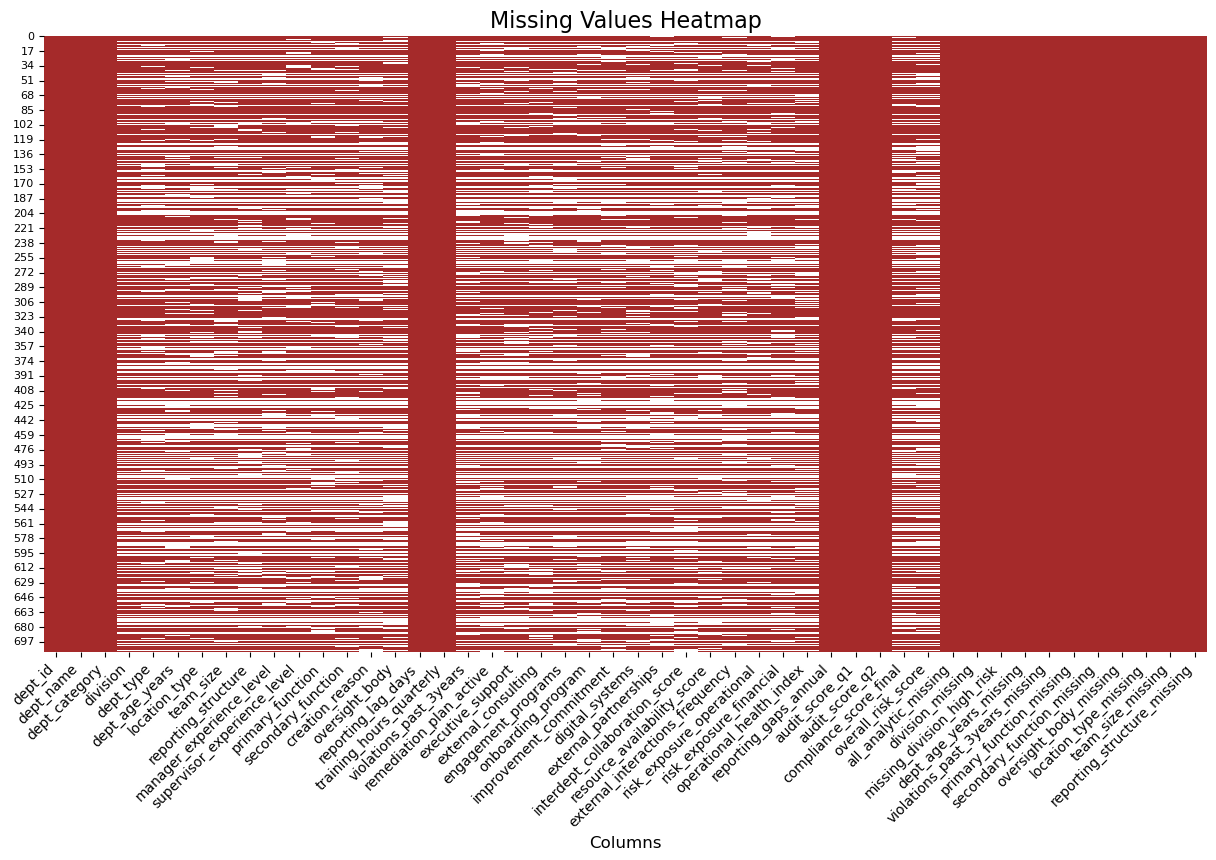

In [1220]:
plt.figure(figsize=(15,8))
sns.heatmap(
    departments_clean.isnull(), 
    cbar=False, 
    cmap=sns.color_palette(["brown", "white"])
)
plt.title('Missing Values Heatmap', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=8)

plt.show()

### ***1.3 Encoding***

---
>#### We will begin with encoding of our categroical variables, in order to be able to work wiht them in trainin our ML model:
>
>The variables which are already numberical (and do not need ot be changed):
>- dept_age_years
>- manager_experience_level
>- supervisor_experience_level
>- reporting_lag_days
>- dept_id (this is the dientifier so we will not do encoding on this one)
>- dept_name (however we have dropped this columns so it does not ned to be encoded)
>- e.t.c
>
>  **These following variables will be encoded using one-hot (dummy variable) encoding since we have no inherent order, and the varivbales do not have so many categories, so in this case OHE is the most effecive.**
>
>- dept_category
>- division
>- dept_type
>- location_type
>- team_size
>- reporting_structure
>- primary_function
>- secondary_function
>- creation_reason
>- oversight_body
---

In [974]:
#we liust the variable swhich shall bve encoded as said before
categorical_cols_to_encode = [
    'dept_category', 'division', 'dept_type', 'location_type', 
    'team_size', 'reporting_structure', 'primary_function', 
    'secondary_function', 'creation_reason', 'oversight_body'
]

# we store safely the 'dept_id' column separately since we are creatign a new data farnme wiht the categorical varibales
#thi is nodne since otherwise we would lose the dept_id column which is necessary for identification
department_ids = departments_clean['dept_id']

# then we drop the 'dept_id' from the working dataframe so it is not encoded, since the pd.get_dummies will be encoding all catheorical variables included in the original dataframe
departments_working = departments_clean.drop(columns=['dept_id'])

# then here we perform one-H´hot encoding using the pd.get_dummies function as we know
departments_encoded = pd.get_dummies(
    departments_working, 
    columns=categorical_cols_to_encode, 
    drop_first=True,
    dtype=int
)

# then we finally insert the original dept_id column back into the encoded dataframe
departments_encoded.insert(0, 'dept_id', department_ids)

#just to viualise the encoded varibales innthe dataframe we print the head of the encoded dataframe
print("Encoding finished. First 5 rows of the encoded dataframe:\n")
print(departments_encoded.head())

#Chekc for shape of dataframe
print(f"\nFinal DataFrame Shape: {departments_encoded.shape}")

Encoding finished. First 5 rows of the encoded dataframe:

     dept_id                   dept_name  dept_age_years  \
0  DEPT-1620             Core Compliance             8.0   
1  DEPT-1133          Digital Governance             8.0   
2  DEPT-4917                 Central Hub             NaN   
3  DEPT-6959  Compliance - Legacy Region             8.0   
4  DEPT-4312      West Internal Controls             6.0   

   manager_experience_level  supervisor_experience_level  reporting_lag_days  \
0                       2.0                          2.0                 1.0   
1                       2.0                          2.0                 1.0   
2                       NaN                          NaN                 1.0   
3                       4.0                          3.0                 1.0   
4                       1.0                          NaN                 2.0   

   training_hours_quarterly  violations_past_3years  remediation_plan_active  \
0                  

### ***1.4 Outliers***

#### **Outliers:** General analysis

---
> To check know the method we need to apply to detect outliers, we first need to check the numeric columns' distribution.
---

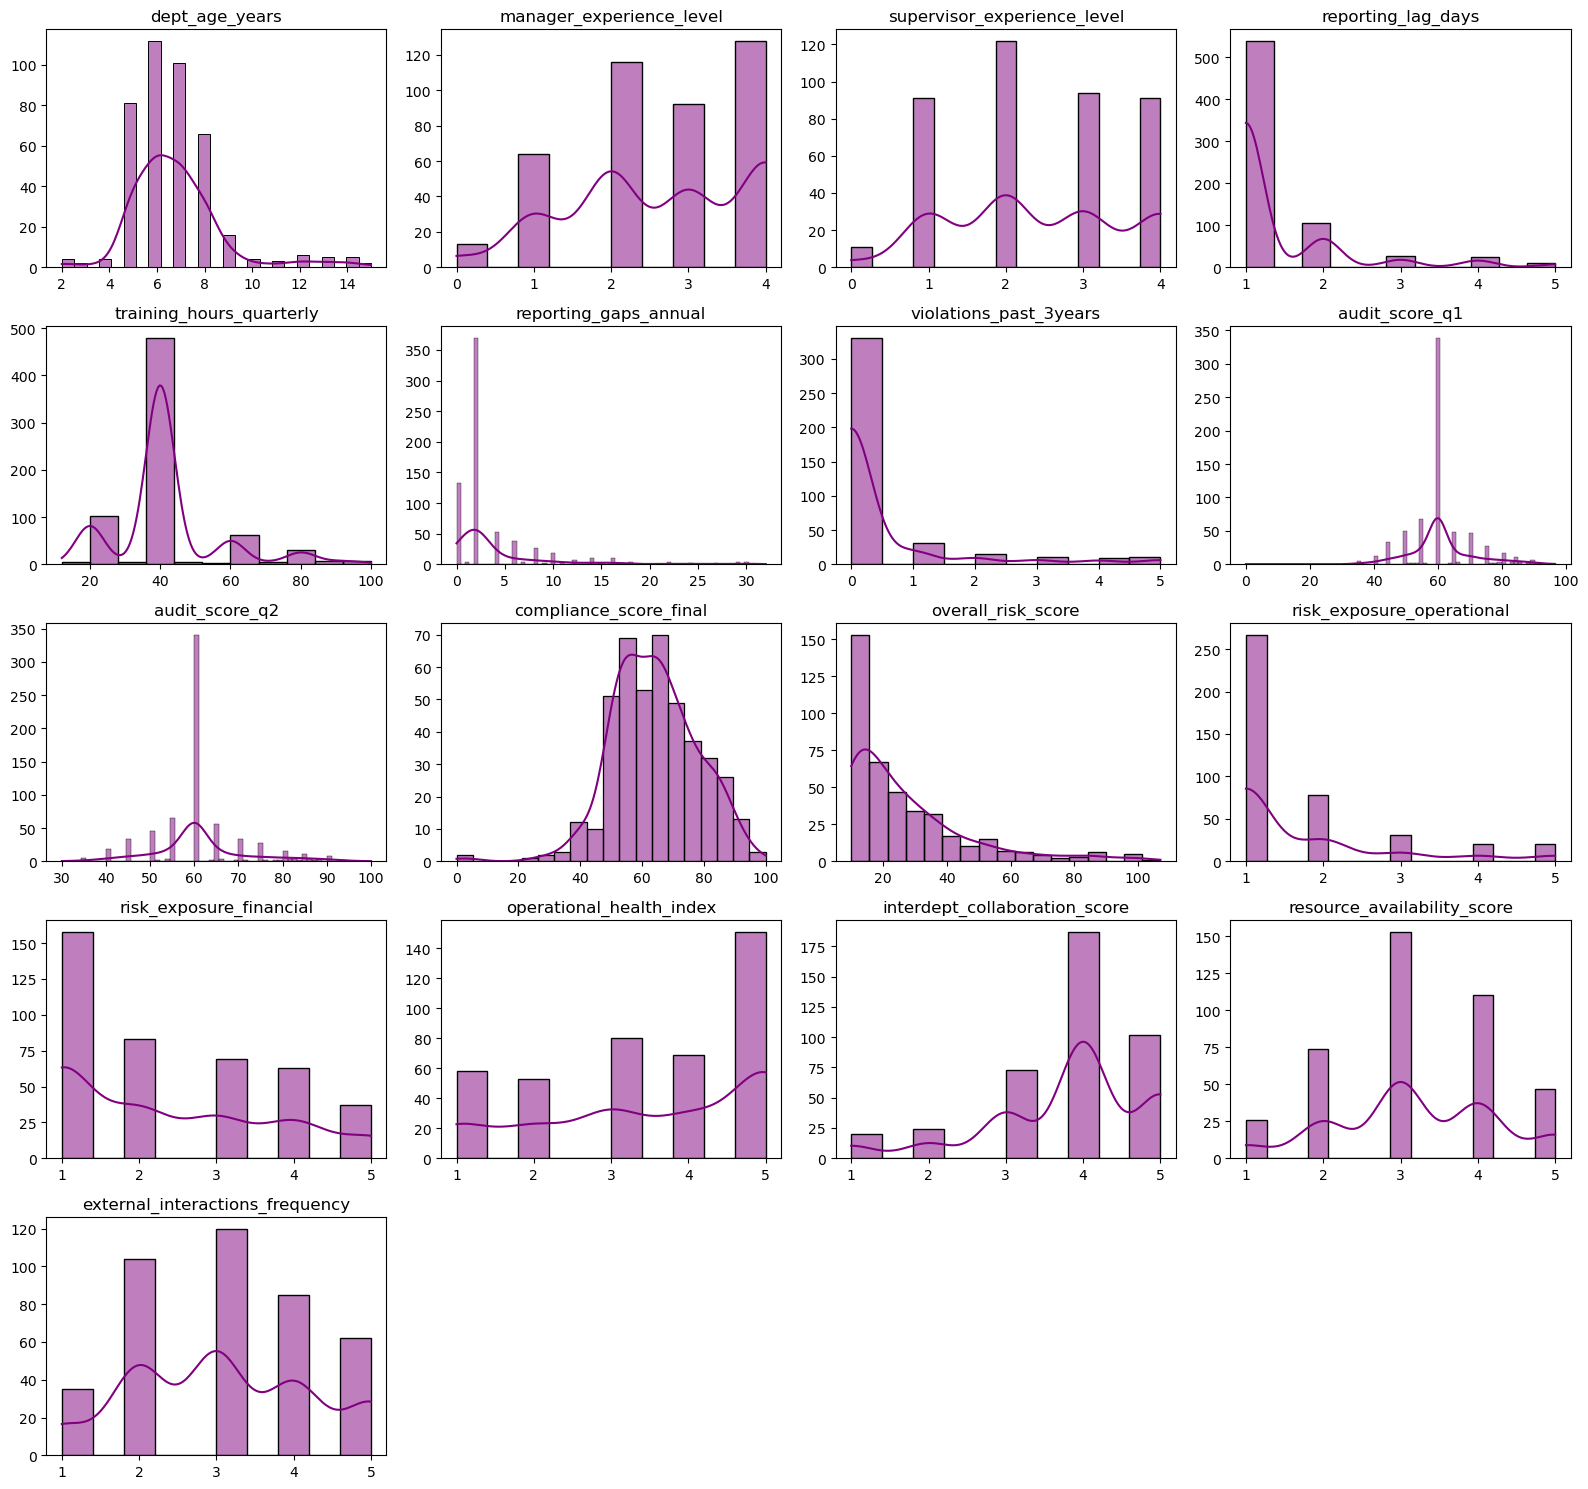

In [1222]:
numeric_cols = [
    "dept_age_years",
    "manager_experience_level",
    "supervisor_experience_level",
    "reporting_lag_days",
    "training_hours_quarterly",
    "reporting_gaps_annual",
    "violations_past_3years",
    "audit_score_q1",
    "audit_score_q2",
    "compliance_score_final",
    "overall_risk_score",
    "risk_exposure_operational",
    "risk_exposure_financial",
    "operational_health_index",
    "interdept_collaboration_score",
    "resource_availability_score",
    "external_interactions_frequency",
]

# Filter only existing columns
numeric_cols = [col for col in numeric_cols if col in departments_clean.columns]

n_cols = 4  # number of plots per row
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(4 * n_cols, 3 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(departments_clean[col].dropna(), kde=True, color='purple')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [1224]:
for col in numeric_cols:
    if col in departments_clean.columns:
        stat, p = shapiro(departments_clean[col].dropna())
        print(f"{col}: W={stat:.3f}, p={p:.3f}", end=" → ")
        print("Not normal" if p < 0.05 else "Normal")

dept_age_years: W=0.843, p=0.000 → Not normal
manager_experience_level: W=0.877, p=0.000 → Not normal
supervisor_experience_level: W=0.893, p=0.000 → Not normal
reporting_lag_days: W=0.531, p=0.000 → Not normal
training_hours_quarterly: W=0.743, p=0.000 → Not normal
reporting_gaps_annual: W=0.622, p=0.000 → Not normal
violations_past_3years: W=0.452, p=0.000 → Not normal
audit_score_q1: W=0.889, p=0.000 → Not normal
audit_score_q2: W=0.890, p=0.000 → Not normal
compliance_score_final: W=0.971, p=0.000 → Not normal
overall_risk_score: W=0.802, p=0.000 → Not normal
risk_exposure_operational: W=0.652, p=0.000 → Not normal
risk_exposure_financial: W=0.841, p=0.000 → Not normal
operational_health_index: W=0.845, p=0.000 → Not normal
interdept_collaboration_score: W=0.837, p=0.000 → Not normal
resource_availability_score: W=0.913, p=0.000 → Not normal
external_interactions_frequency: W=0.912, p=0.000 → Not normal


---
> Since data is mostly not normally distributed, we use the IQR rule: anything below or above IQR is a potential outlier. Here, we do not immediately delete or change them; we first report how many there are.
---

In [1227]:
numeric_outlier_cols = [
    "dept_age_years",
    "manager_experience_level",
    "supervisor_experience_level",
    "reporting_lag_days",
    "training_hours_quarterly",
    "reporting_gaps_annual",
    "violations_past_3years",
    "audit_score_q1",
    "audit_score_q2",
    "compliance_score_final",
    "overall_risk_score",
    "risk_exposure_operational",
    "risk_exposure_financial",
    "operational_health_index",
    "interdept_collaboration_score",
    "resource_availability_score",
    "external_interactions_frequency",
]

numeric_outlier_info = []

for col in numeric_outlier_cols:
    if col not in departments_clean.columns:
        continue

    series = departments_clean[col].dropna()
    if series.empty:
        continue

    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    is_outlier = (departments_clean[col] < lower) | (departments_clean[col] > upper)
    n_outliers = is_outlier.sum()

    numeric_outlier_info.append((col, n_outliers, float(lower), float(upper)))

outlier_df = pd.DataFrame(
    numeric_outlier_info,
    columns=["column", "n_outliers", "lower_bound", "upper_bound"]
)

outlier_df

,column,n_outliers,lower_bound,upper_bound
0,dept_age_years,22,3.000,11.000
1,manager_experience_level,0,-1.000,7.000
2,supervisor_experience_level,11,0.500,4.500
3,reporting_lag_days,170,1.000,1.000
4,training_hours_quarterly,233,40.000,40.000
5,reporting_gaps_annual,105,-1.000,7.000
6,violations_past_3years,75,0.000,0.000
7,audit_score_q1,187,50.500,73.700
8,audit_score_q2,199,52.500,72.500
9,compliance_score_final,2,25.000,105.000


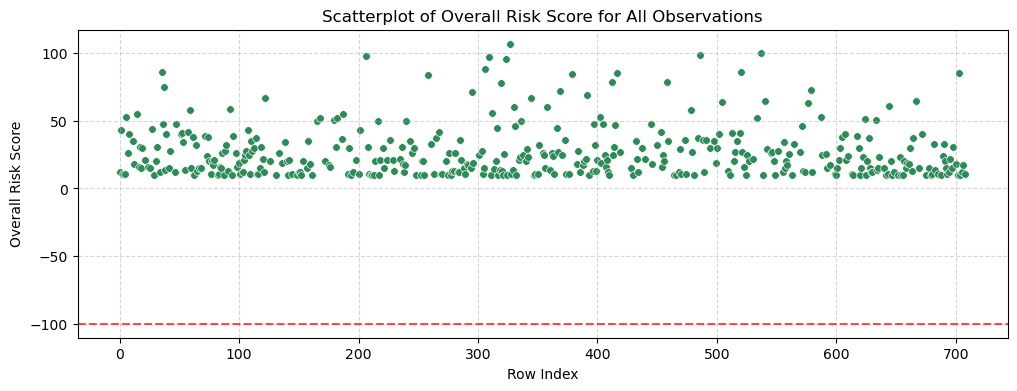

In [1233]:

# Scatterplot of overall_risk_score
plt.figure(figsize=(12, 4))
sns.scatterplot(
    x=departments.index, 
    y=departments['overall_risk_score'], 
    color='seagreen',
    s=30  # marker size
)

plt.xlabel("Row Index")
plt.ylabel("Overall Risk Score")
plt.title("Scatterplot of Overall Risk Score for All Observations")
plt.axhline(-100, color='red', linestyle='--', alpha=0.7)  # reference line at 0
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

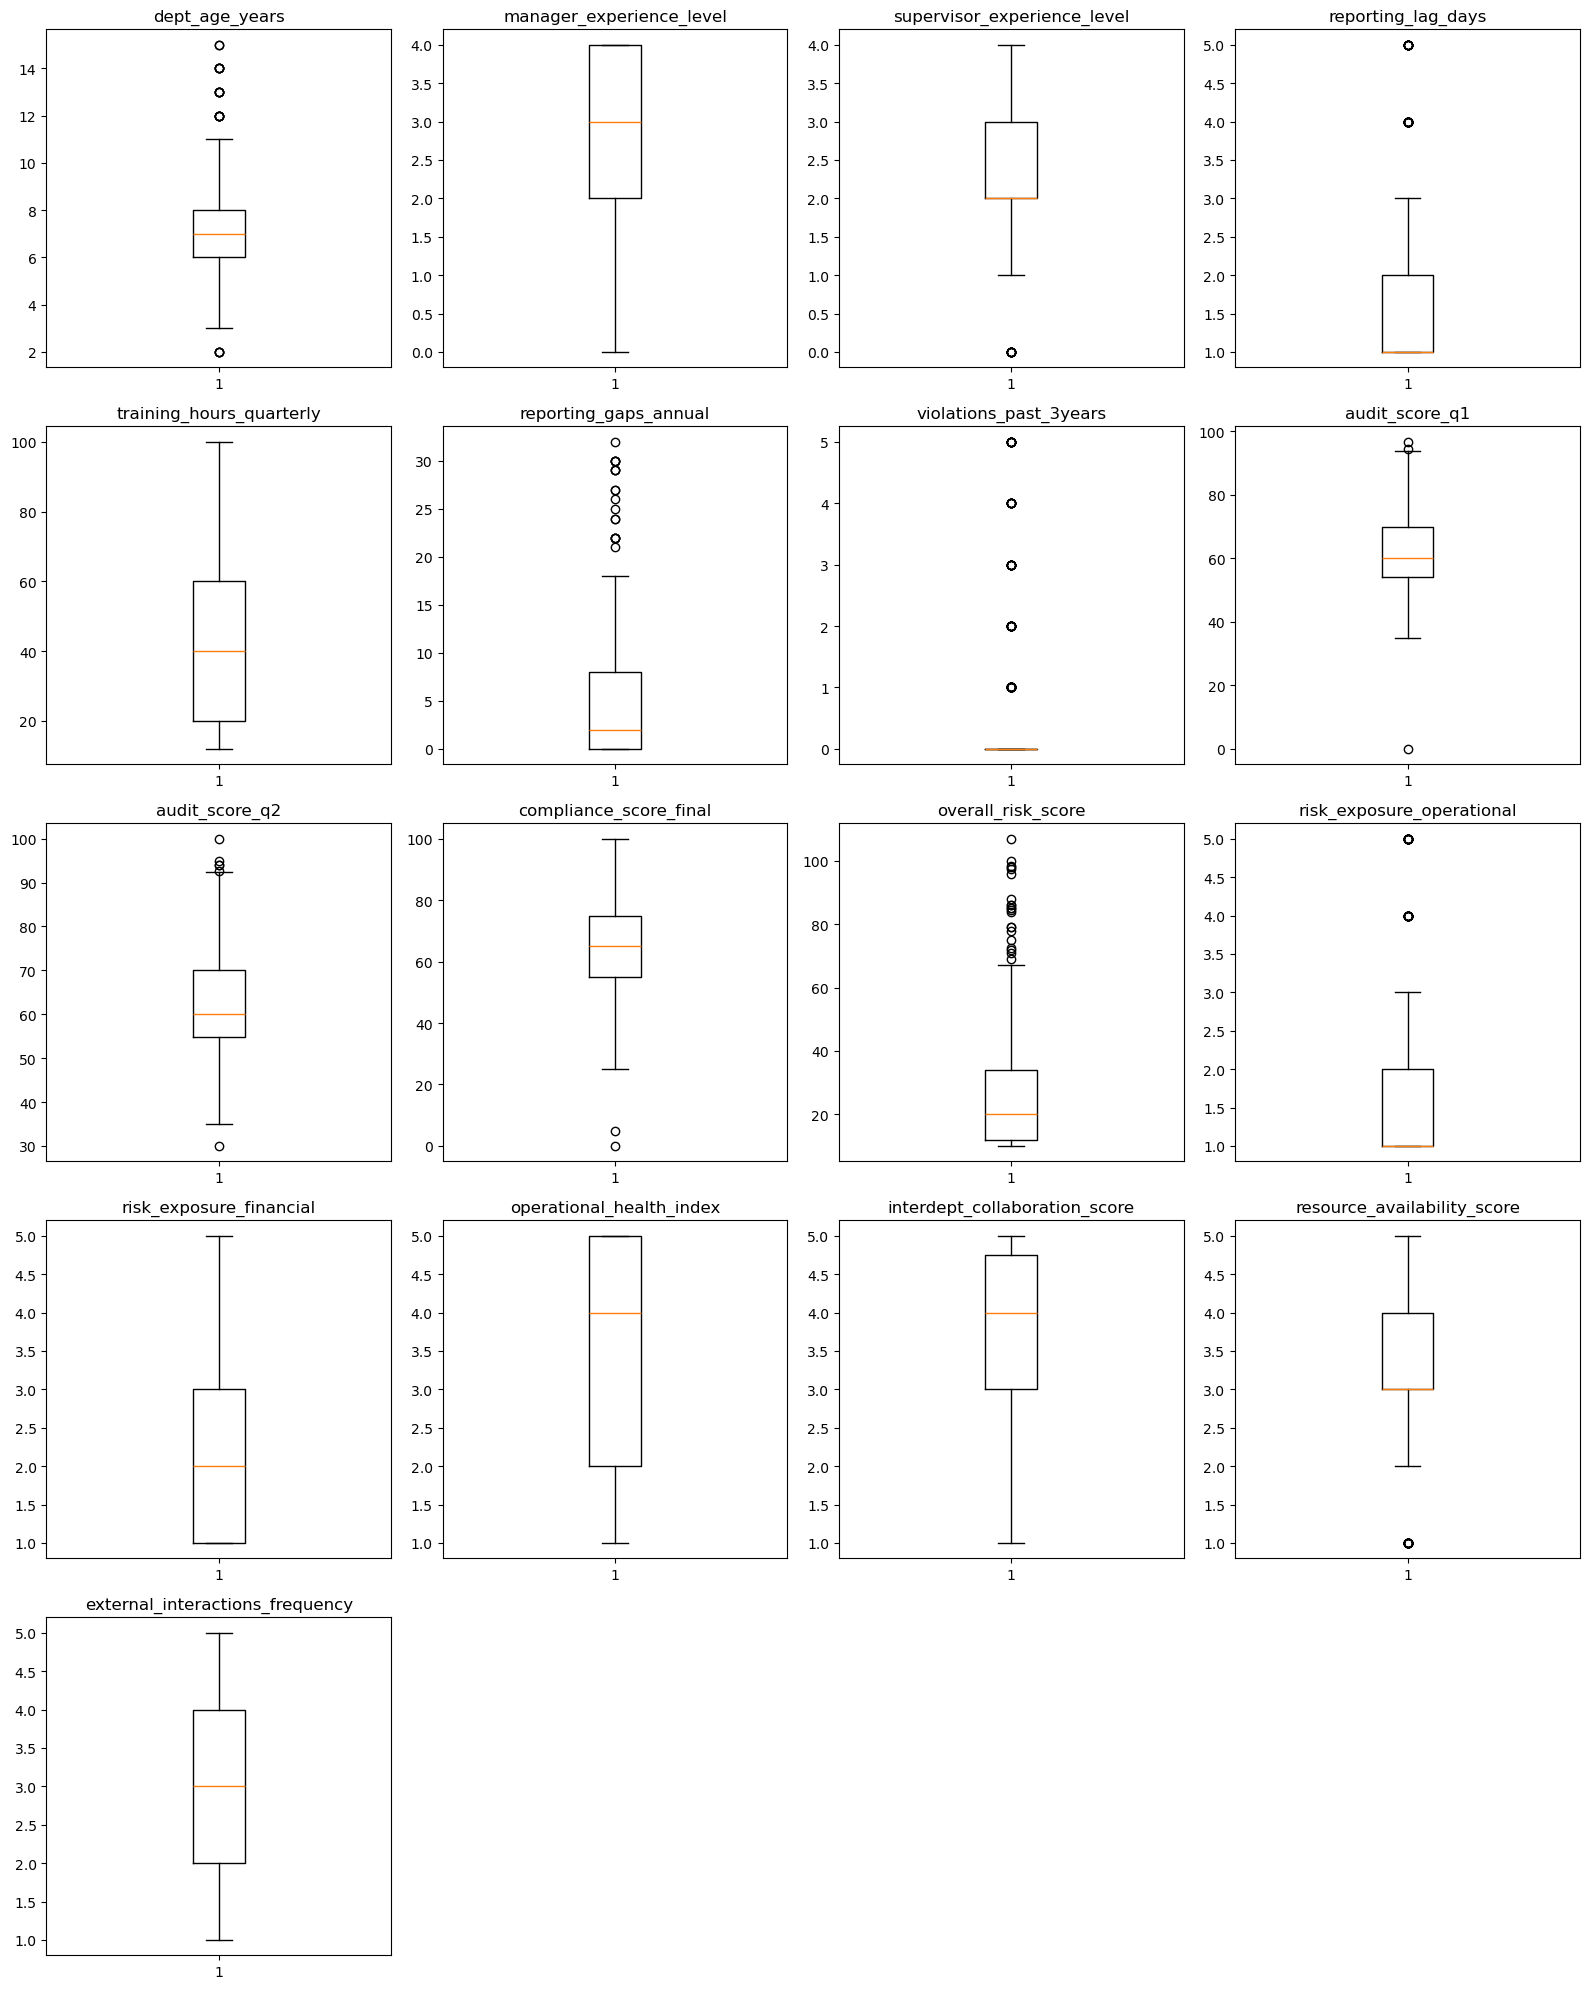

In [1117]:
#visualise with boxplot
df = departments_clean[[c for c in numeric_outlier_cols if c in departments_clean.columns]]

n_cols = 4
n_rows = int(len(df.columns) / n_cols) + 1

plt.figure(figsize=(16, 4 * n_rows))

for i, col in enumerate(df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.boxplot(df[col].dropna())
    plt.title(col)

plt.tight_layout()
plt.show()

---
>Keep as they are:
>
>- dept_age_years, manager_experience_level, supervisor_experience_level, reporting_gaps_annual, audit_score_q1, audit_score_q2, reporting_lag_days, violations_past_3years, training_hours_quarterly  - these are nor real outliers.
>
>Delete outliers (make NaN):
>- compliance_score_final, 
>
>Flag negative, then convert to NaN for imputation; replace outliers with NaN:
>- overall_risk_scor
>
>Replace negatives with NaN:
>- risk_exposure_operational 
>
>Other scores – mostly 0 outliers, these variables seem normal.
---

In [1015]:
# Delete outliers (make NaN) for compliance_score_final
if "compliance_score_final" in departments_clean.columns:
    Q1 = departments_clean["compliance_score_final"].quantile(0.25)
    Q3 = departments_clean["compliance_score_final"].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_mask = (departments_clean["compliance_score_final"] < lower) | \
                   (departments_clean["compliance_score_final"] > upper)
    departments_clean.loc[outlier_mask, "compliance_score_final"] = np.nan

# Flag negative overall_risk_score then convert to NaN
if "overall_risk_score" in departments_clean.columns:
    departments_clean["overall_risk_score_negative_flag"] = (departments_clean["overall_risk_score"] < 0).astype(int)
    departments_clean.loc[departments_clean["overall_risk_score"] < 0, "overall_risk_score"] = np.nan

## Delete outliers (make NaN) for overall_risk_scor
if "overall_risk_scor" in departments_clean.columns:
    Q1 = departments_clean["overall_risk_scor"].quantile(0.25)
    Q3 = departments_clean["overall_risk_scor"].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_mask = (departments_clean["overall_risk_scor"] < lower) | \
                   (departments_clean["overall_risk_scor"] > upper)
    departments_clean.loc[outlier_mask, "overall_risk_scor"] = np.nan



# Replace negatives in risk_exposure_operational with NaN
if "risk_exposure_operational" in departments_clean.columns:
    negative_mask = departments_clean["risk_exposure_operational"] < 0
    departments_clean.loc[negative_mask, "risk_exposure_operational"] = np.nan


---
> For the binary variables, any value that is not 0 or 1 is treated as a logical error.
---

In [1018]:
#Binary variables check

binary_cols = [
    "digital_systems",
    "onboarding_program",
    "improvement_commitment",
    "executive_support",
    "external_consulting",
    "engagement_programs",
    "remediation_plan_active",
    "external_partnerships",
]

print("\nBinary variables (should be only 0/1/NaN):\n")

for col in binary_cols:
    if col not in departments_clean.columns:
        print(f"{col}: column not found, skipping.")
        continue

    unique_vals = departments_clean[col].dropna().unique()
    invalid_vals = [v for v in unique_vals if v not in [0, 1]]

    if invalid_vals:
        print(f"- {col}: unexpected values {invalid_vals}")
    else:
        print(f"- {col}: OK (only 0/1/NaN)")


Binary variables (should be only 0/1/NaN):

- digital_systems: OK (only 0/1/NaN)
- onboarding_program: OK (only 0/1/NaN)
- improvement_commitment: OK (only 0/1/NaN)
- executive_support: OK (only 0/1/NaN)
- external_consulting: OK (only 0/1/NaN)
- engagement_programs: OK (only 0/1/NaN)
- remediation_plan_active: OK (only 0/1/NaN)
- external_partnerships: OK (only 0/1/NaN)


---
> Here, we can see that the binary data is clean and valid.
---

#### **Outliers:** conclusion

---
> We analysed and handeled outliers.
---

### ***1.4 Duplicates***

---
> In this step, we check whether our dataset contains duplicate columns and rows, especially duplicates based on dept_id, which is the unique identifier for each department. 
---

#### **Duplicates:** columns

In [1026]:
# Find duplicate columns
duplicate_columns = []

columns = departments_clean.columns

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Compare columns element-wise
        if departments_clean[columns[i]].equals(departments_clean[columns[j]]):
            duplicate_columns.append((columns[i], columns[j]))

# Output results
if duplicate_columns:
    print("Duplicate columns found:")
    for col1, col2 in duplicate_columns:
        print(f"- {col1} is identical to {col2}")
else:
    print("No duplicate columns found.")


Duplicate columns found:
- all_analytic_missing is identical to division_missing
- missing_division_high_risk is identical to overall_risk_score_negative_flag


#### **Duplicates:** rows

---
> We run to check full-row duplicates.
---

In [1235]:
# Total number of rows
total_rows = departments_clean.shape[0]
print(f"Total number of rows: {total_rows}")

# Check for full-row duplicates
full_duplicates = departments_clean.duplicated().sum()
print(f"Number of full-row duplicates: {full_duplicates}")

# Check for duplicates based on dept_id
id_duplicates = departments_clean['dept_id'].duplicated().sum()
print(f"Number of duplicate dept_id values: {id_duplicates}")

Total number of rows: 709
Number of full-row duplicates: 0
Number of duplicate dept_id values: 27


---
> Are there rows where every column is identical?- No, no such rows were found.
> **BUT:** > We found that 53 rows contain duplicated dept_id values.These correspond to *26 unique departments*.
> In order to fully rely on the dept_id variavle, we needed to drop duplicates.
---

In [1238]:
# Identify duplicated dept_ids
duplicated_mask = departments_clean["dept_id"].duplicated(keep=False)  # marks all duplicates

print("Number of rows with duplicated dept_id:", duplicated_mask.sum())

# Drop duplicated rows
departments_clean = departments_clean[~duplicated_mask].reset_index(drop=True)

print("Dataset shape after dropping duplicates:", departments_clean.shape)

Number of rows with duplicated dept_id: 53
Dataset shape after dropping duplicates: (656, 48)


### ***1.5 Logical Inconsistencies***

>  In the outliers section we already found the following logical inconsistencies in overall_risk_score (outside 0-100 range): 1. We replaced it with NaN for future imputation.

#### **Logical Inconsistencies:** Impossible values

In [1240]:
inconsistent_age = departments_clean[departments_clean['dept_age_years'] < 0]

print(f"Number of departments with impossible negative age: {len(inconsistent_age)}")

##Correct the inconsistency?
# Use .loc to select rows where 'dept_age_years' < 0 and set the value in that column to NaN
#departments.loc[departments['dept_age_years'] < 0, 'dept_age_years'] = np.nan

#print("\nNegative 'dept_age_years' values have been replaced with NaN.")

# 1. reporting_lag_days, the inconsistency check: Values <0
column_name = 'reporting_lag_days'
inconsistencies = departments_clean[departments_clean[column_name] < 0]
print(f"1. Inconsistencies found in {column_name} (negative lag): {len(inconsistencies)}")

# ----------------------------------------------------------------------

## 2. training_hours_quarterly, the inconsistency check: Values <0
column_name = 'training_hours_quarterly'
inconsistencies = departments_clean[departments_clean[column_name] < 0]
print(f"2. Inconsistencies found in {column_name} (negative hours): {len(inconsistencies)}")

# ----------------------------------------------------------------------

## 3. violations_past_3years, the inconsistency check: Values <0
column_name = 'violations_past_3years'
inconsistencies = departments_clean[departments_clean[column_name] < 0]
print(f"3. Inconsistencies found in {column_name} (negative count): {len(inconsistencies)}")

# ----------------------------------------------------------------------

## 4. audit_score_q1, audit_score_q2, compliance_score_final, the inconsistency check: Values <0 or >100
score_columns = ['audit_score_q1', 'audit_score_q2', 'compliance_score_final', 'overall_risk_score']

for col in score_columns:
    # Identify values that are either less than 0 OR greater than 100
    inconsistencies = departments_clean[(departments_clean[col] < 0) | (departments_clean[col] > 100)]
    print(f"4. Inconsistencies found in {col} (outside 0-100 range): {len(inconsistencies)}")

Number of departments with impossible negative age: 0
1. Inconsistencies found in reporting_lag_days (negative lag): 0
2. Inconsistencies found in training_hours_quarterly (negative hours): 0
3. Inconsistencies found in violations_past_3years (negative count): 0
4. Inconsistencies found in audit_score_q1 (outside 0-100 range): 0
4. Inconsistencies found in audit_score_q2 (outside 0-100 range): 0
4. Inconsistencies found in compliance_score_final (outside 0-100 range): 0
4. Inconsistencies found in overall_risk_score (outside 0-100 range): 1


---
> # replace this one inconsistency with NaN
---

#### **Logical Inconsistencies:** Structural/categorival

In [506]:
is_final_score_missing = departments['compliance_score_final'].isna()

# Condition B: Audits are present (i.e., EITHER Q1 score is NOT NaN OR Q2 score is NOT NaN)
is_audit_present = departments['audit_score_q1'].notna() | departments['audit_score_q2'].notna()

# 2. Combine the conditions using the AND operator (&)
# The inconsistency is A AND B
inconsistent_scores = departments[is_final_score_missing & is_audit_present]

# 3. Print the result
print("--- Cross-Column Validation Check ---")
print(f"Number of inconsistencies (Final Score Missing BUT Audit Data Present): {len(inconsistent_scores)}")

# Optional: Print the IDs of the inconsistent rows for inspection
if len(inconsistent_scores) > 0:
    print("Inconsistent Dept IDs (First 5):")
    # Using .head() to only show the first few IDs
    print(inconsistent_scores['dept_id'].head().tolist())

--- Cross-Column Validation Check ---
Number of inconsistencies (Final Score Missing BUT Audit Data Present): 22
Inconsistent Dept IDs (First 5):
['DEPT-1133', 'DEPT-7180', 'DEPT-2792', 'DEPT-5625', 'DEPT-7521']


In [508]:
is_zero_violations = (departments['violations_past_3years'] == 0)

# Condition B: Remediation plan is active (assuming '1' means active)
# You may need to adjust '1' if the column uses True/False or a string like 'Active'
is_plan_active = (departments['remediation_plan_active'] == 1)

# Combine the conditions using the AND operator (&)
inconsistent_remediation = departments[is_zero_violations & is_plan_active]

# Print the result
print("--- Violations vs. Remediation Check ---")
print(f"Number of departments with 0 violations BUT an active remediation plan: {len(inconsistent_remediation)}")

# Optional: Print the IDs of the inconsistent rows for inspection
if len(inconsistent_remediation) > 0:
    print("Inconsistent Dept IDs (First 5):")
    print(inconsistent_remediation['dept_id'].head().tolist())

--- Violations vs. Remediation Check ---
Number of departments with 0 violations BUT an active remediation plan: 39
Inconsistent Dept IDs (First 5):
['DEPT-1620', 'DEPT-4790', 'DEPT-1003', 'DEPT-4301', 'DEPT-1344']


---
> # So what do we do with these?
---

### ***1.7 Multicolinearity check***

---
> Now we will dig into searching for multicollinearuty between our varibales, since this might be problematic for our future model training
>- This step is critical for creating an analytical framework for explanation and risk mitigation
>- As an exapmle if two of our variables lets say: if team_size_Large and reporting_structure_Centralized are 95% correlated, our model will not be able to detect which of these two varibles are responsible for a change in the risk score
>- In addition, statistically multicollinearity might create more unstabile and harder to train models.
>
> We cab dtect multicollineraity using the VIF (variance inflation factor). The VIF measures how much the variance of a regression coefficient is increased due to collinearity with other predictors.
---

In [518]:
from sklearn.linear_model import LinearRegression

# Assuming 'departments_encoded' is your final DataFrame

# 1. Define all columns to be EXCLUDED (IDs and Targets)
columns_to_exclude = [
    'dept_id', 
    'dept_name', # Include if it hasn't been dropped previously
    'compliance_score_final', 
    'overall_risk_score'
]

# we create the predictor dataframe multi_col_check
# Use errors='ignore' in case some columns (like dept_name) are already gone.
multi_col_check = departments_clean.drop(columns=columns_to_exclude, errors='ignore')

# we select only numerical columns
# This enforces the removal of any remaining string/object columns that pd.get_dummies might have missed 
# or that were left behind (like 'dept_name').
multi_col_check = multi_col_check.select_dtypes(include=np.number) 

# 4. Handle Remaining NaNs (Imputation)
# This step is now safe because X only contains numbers.
# We must impute any remaining NaNs, even if they were just flagged, 
# because the Linear Regression model cannot run with them.
multi_col_check = multi_col_check.fillna(multi_col_check.mean()) 
print("Data frame multi_col_check is prepared and all NaNs are handled.")


# 5. Calculate VIF (The rest of your original loop)
vif_data = pd.DataFrame()
vif_data["Feature"] = multi_col_check.columns
vif_list = []

for i in range(multi_col_check.shape[1]):
    y = multi_col_check.iloc[:, i] 
    multi_col_check_i = multi_col_check.drop(columns=multi_col_check.columns[i])
    model = LinearRegression()
    model.fit(multi_col_check_i, y)
    R2 = model.score(multi_col_check_i, y)
    VIF = 1 / (1 - R2)
    vif_list.append(VIF)

vif_data["VIF"] = vif_list
vif_data = vif_data.sort_values(by="VIF", ascending=False).round(2)

print("\nManual Multicollinearity Check (VIF) ")
print(vif_data)

NameError: name 'np' is not defined

#### Noww we have obtained the VIF score for our vatibales and we have to analyse according to their score wether we can dtermine they idenitfy any numtlicollineratyi;

We can contuniue using the following rules:
- VIF < 5: 

Normal feature., not strongly correlated with others

Keep it as it is as it is safe to use in our analysis

-  5 < VIF < 10: 

Attention! we should keep this in mnd as it might be an idicator for mutlicollinerity

so we should investigate further we might remove it if we have a similar, better feature, but if it's really important we might keep it noting the possibel instability

- VIF > 10 or greater:

This is defineitly a problem adn we have detected mutlicollinerity

so we must fix it, drop this problematic feature (or the correlated partner) and immediately re-run the VIF check on the remaining data

In [521]:
# we defined the VIF thresholds for categorization as above
threshold_certain = 10.0
threshold_possible = 5.0

# we create a new column 'multicollinearity_level' based on the VIF score
def categorize_vif(vif_score):
    if vif_score >= threshold_certain:
        return "certain multicollinearity (VIF >= 10)"
    elif vif_score >= threshold_possible:
        return "possible multicollinearity (VIF >= 5)"
    else:
        return "no multicollinearity (VIF < 5)"

# Apply the categorization function to the VIF column
vif_data['multicollinearity_level'] = vif_data['VIF'].apply(categorize_vif)

print("--- Categorized Multicollinearity Levels ---")

# we shows the variables with ceratin multicollinerity
print("\n--- certain multicollinearity ---")
print(vif_data[vif_data['VIF'] >= threshold_certain])
print("-" * 30)

# we show the variables with multicollinearity
print("\n--- possible multicollinearity ---")
print(vif_data[(vif_data['VIF'] >= threshold_possible) & (vif_data['VIF'] < threshold_certain)])
print("-" * 30)

# we show the variables with NO multicollinearity
print("\n--- no multicollinearity (VIF < 5) ---")
# Only print a sample since this list is usually long
print(vif_data[vif_data['VIF'] < threshold_possible].head())

NameError: name 'vif_data' is not defined

In [524]:
### TASKS

---
> All these steps will help us finish with cleaning. However, EDA will not be finished yet. I will do the rest of EDA: bivariate analysis, multicolinearity reduction (using Filippa's insights), feature engineering, feature selection.
>
>Then we will start working on the model.
>
>After that, model evaluation, improvement.
>
> Interface, potentially website(if we have time)

 ---

In [1049]:
### **Bivariate analysis**

---
> Bivariate analysis
>- Numerical vs. target
>- Categorical vs. target
>- Visualizations + stats tests
---A. Numerical → Targets

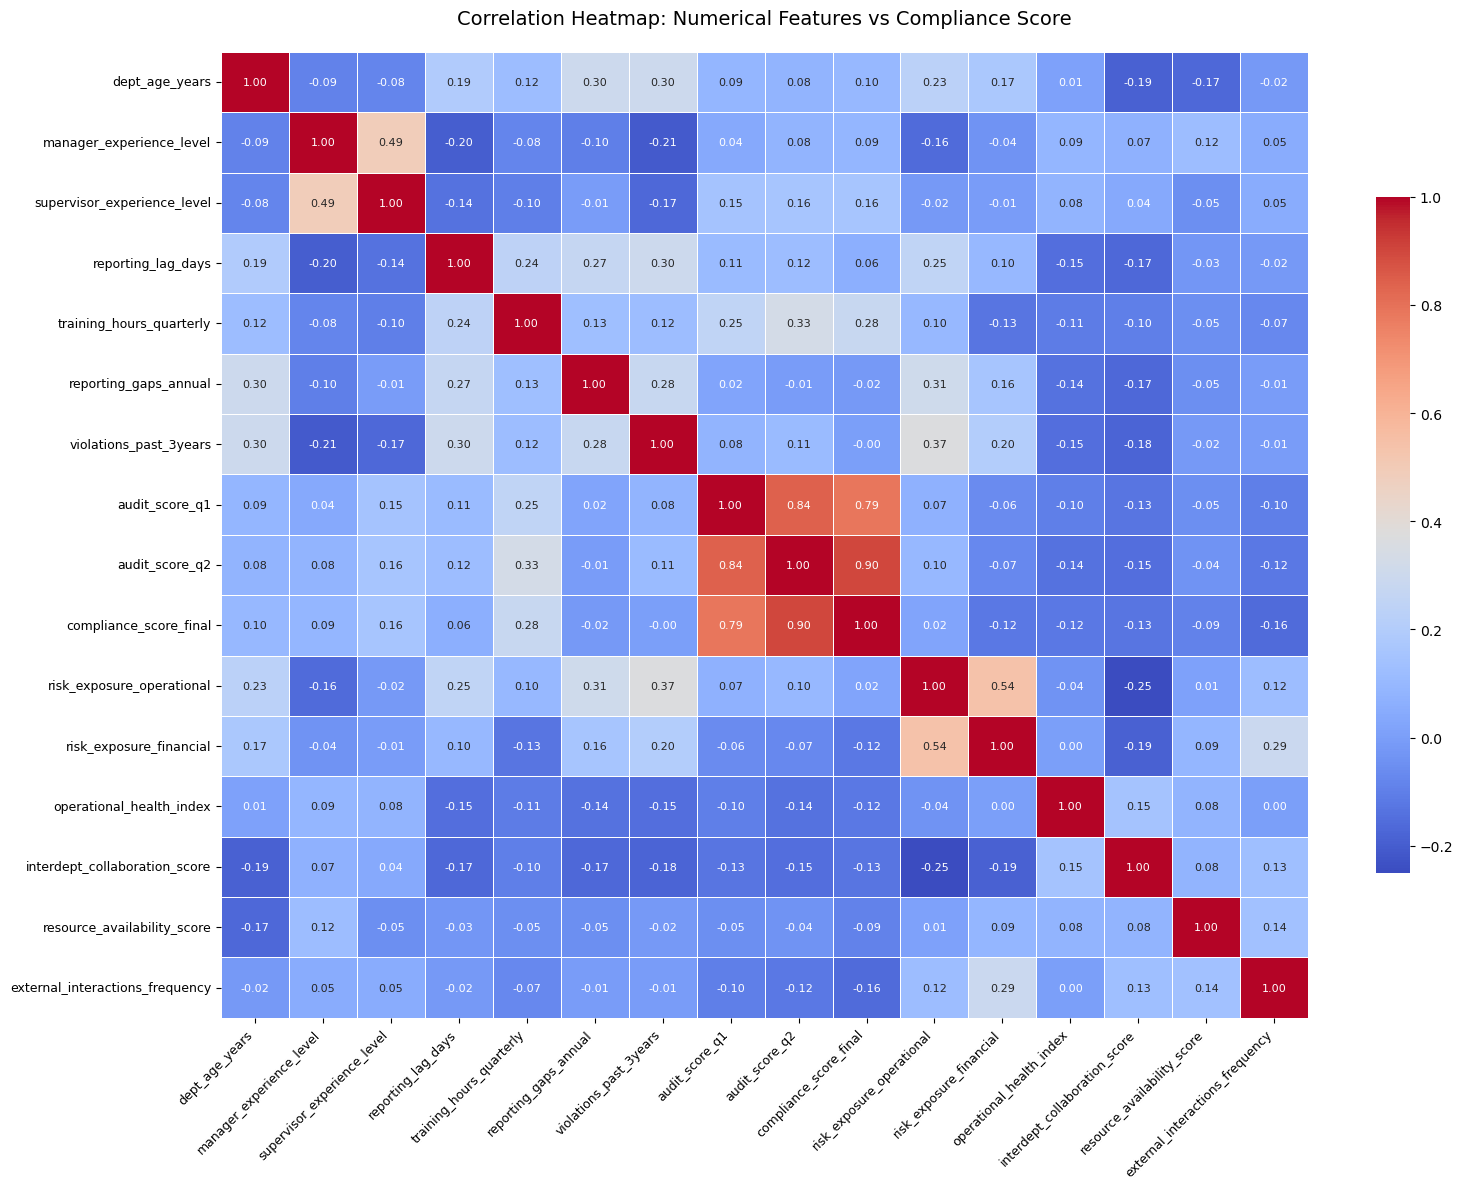

In [1246]:
target1 = ["compliance_score_final"]

# Keep numeric_cols order, remove overall_risk_score, then add target1 but avoid duplicates
cols = [col for col in numeric_cols if col != "overall_risk_score"]
cols += [col for col in target1 if col not in cols]  # add target1 only if not already in cols

# Build correlation matrix
corr_matrix = departments_clean[cols].corr().round(2)

plt.figure(figsize=(16, 12))

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 8},
    cbar_kws={"shrink": 0.7}
)

plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.title("Correlation Heatmap: Numerical Features vs Compliance Score", fontsize=14, pad=20)

plt.tight_layout()
plt.show()

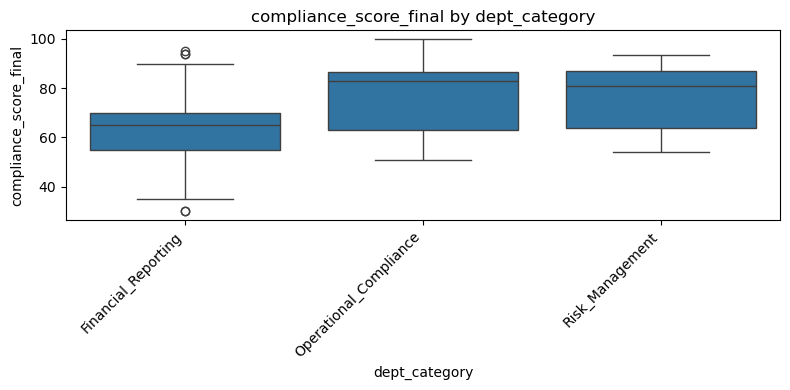

compliance_score_final ~ dept_category: Kruskal-Wallis H=15.80, p=0.0004



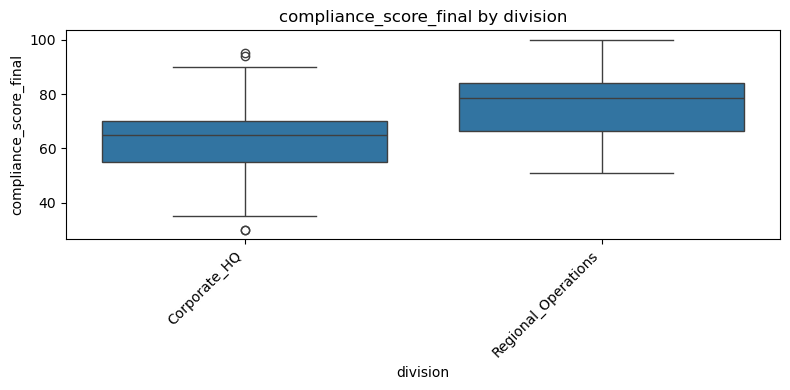

compliance_score_final ~ division: Kruskal-Wallis H=15.56, p=0.0001



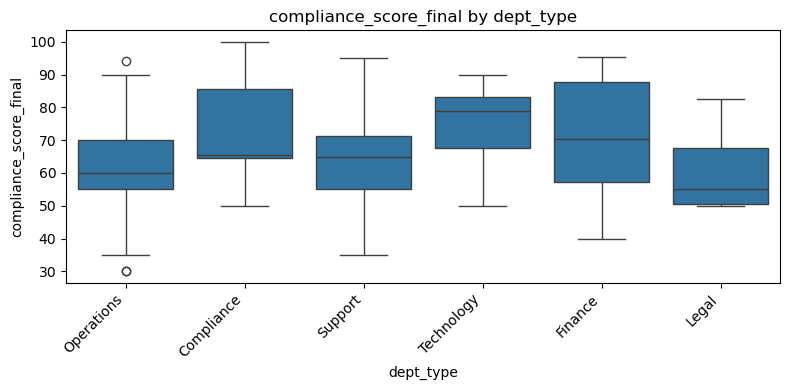

compliance_score_final ~ dept_type: Kruskal-Wallis H=24.10, p=0.0002



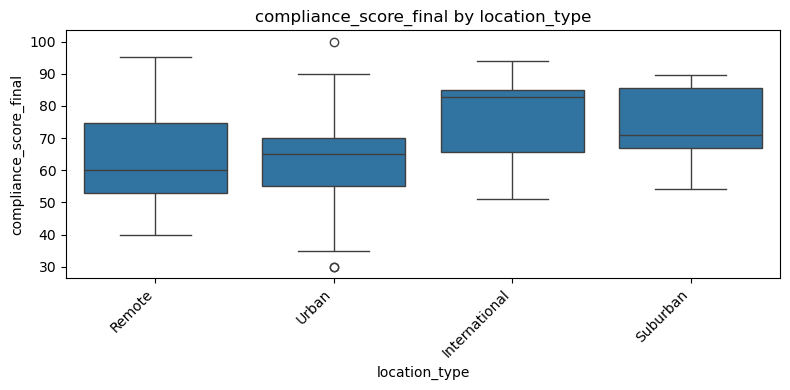

compliance_score_final ~ location_type: Kruskal-Wallis H=14.11, p=0.0028



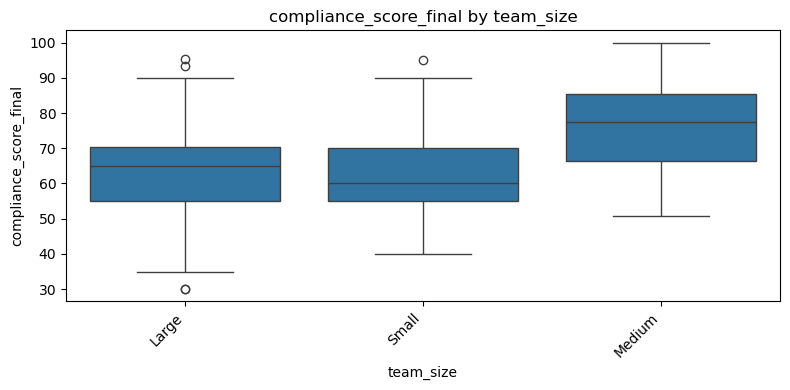

compliance_score_final ~ team_size: Kruskal-Wallis H=9.99, p=0.0068



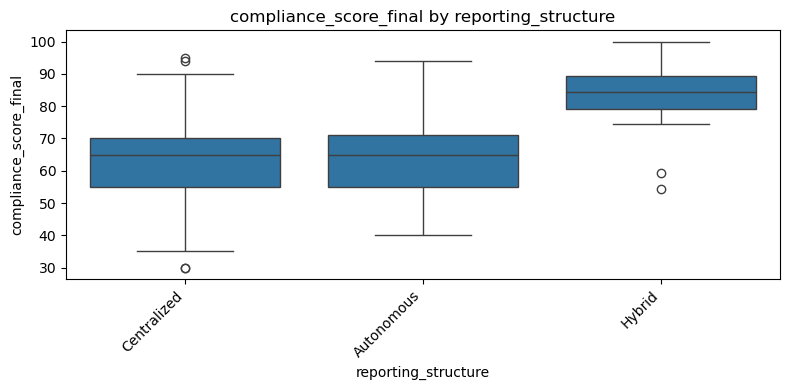

compliance_score_final ~ reporting_structure: Kruskal-Wallis H=17.58, p=0.0002



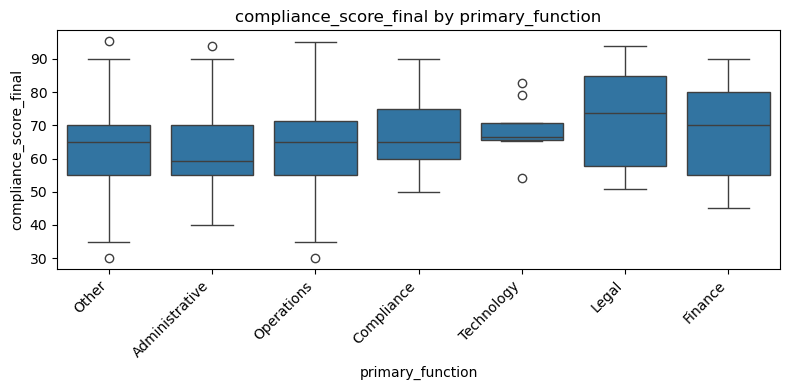

compliance_score_final ~ primary_function: Kruskal-Wallis H=15.41, p=0.0173



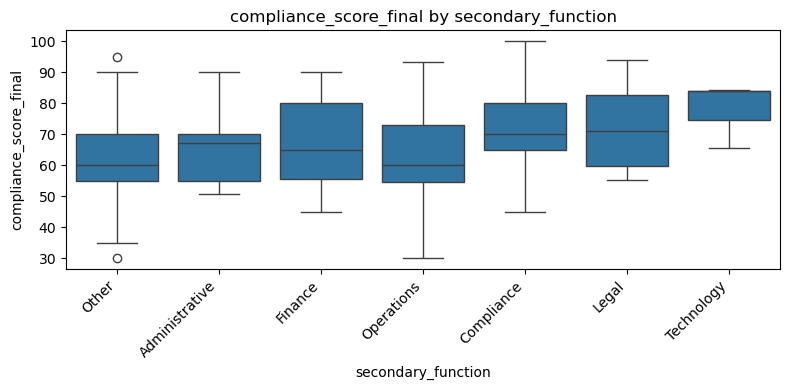

compliance_score_final ~ secondary_function: Kruskal-Wallis H=23.25, p=0.0007



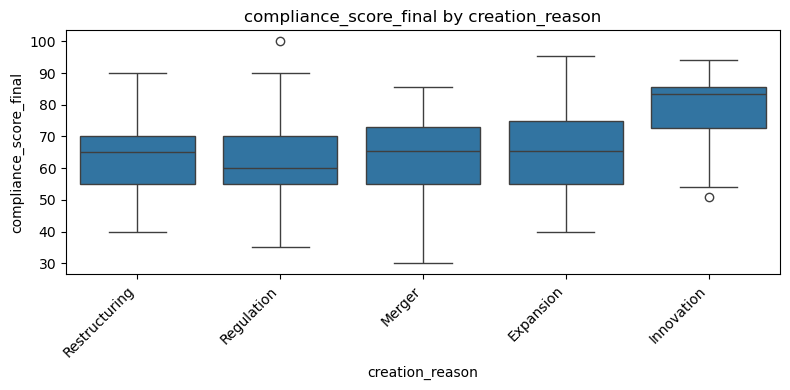

compliance_score_final ~ creation_reason: Kruskal-Wallis H=21.27, p=0.0003



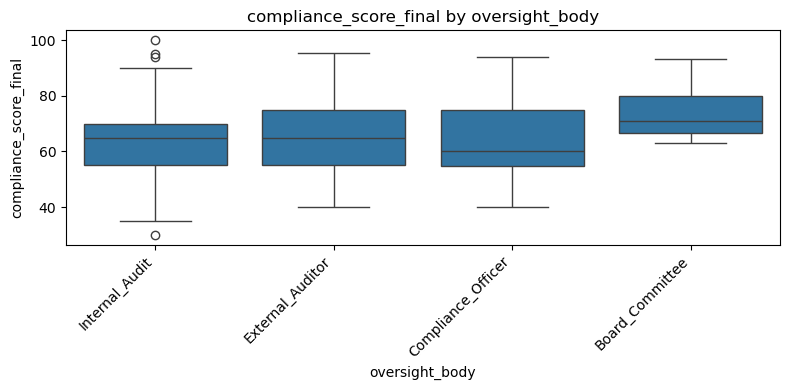

compliance_score_final ~ oversight_body: Kruskal-Wallis H=4.19, p=0.2415



In [1093]:
categorical_cols = ["dept_category", "division", "dept_type", "location_type", "team_size",
                    "reporting_structure", "primary_function", "secondary_function",
                    "creation_reason", "oversight_body"]

target1 = "compliance_score_final"

for cat_col in categorical_cols:
    if cat_col not in departments_clean.columns:
        continue
    
    plt.figure(figsize=(8,4))
    sns.boxplot(x=cat_col, y=target1, data=departments_clean)
    plt.xticks(rotation=45, ha="right")
    plt.title(f"{target1} by {cat_col}")
    plt.tight_layout()
    plt.show()
    
    groups = [group.dropna() for name, group in departments_clean.groupby(cat_col)[target1]]
    if any(len(g) < 2 for g in groups):
        print(f"Skipping statistical test for {target1} ~ {cat_col} (small group)")
        continue

    stat, p = kruskal(*groups)
    print(f"{target1} ~ {cat_col}: Kruskal-Wallis H={stat:.2f}, p={p:.4f}\n")

In [1105]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

target = "compliance_score_final"
categorical_cols = [
    "dept_category", "division", "dept_type", "location_type",
    "team_size", "reporting_structure", "primary_function",
    "secondary_function", "creation_reason", "oversight_body"
]

n_cols = 4  # plots per row
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
axes = axes.flatten()

for i, cat_col in enumerate(categorical_cols):
    if cat_col not in departments_clean.columns:
        continue
    
    sns.boxplot(
        x=cat_col,
        y=target,
        data=departments_clean,
        color=sns.color_palette("pink")[2],  # fixed deep color
        ax=axes[i]
    )
    axes[i].tick_params(axis='x', rotation=30, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
    axes[i].set_title(cat_col, fontsize=10)

# Remove empty axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


    groups = [group.dropna() for name, group in departments_clean.groupby(cat_col)[target1]]
    if any(len(g) < 2 for g in groups):
        print(f"Skipping statistical test for {target1} ~ {cat_col} (small group)")
        continue

    stat, p = kruskal(*groups)
    print(f"{target1} ~ {cat_col}: Kruskal-Wallis H={stat:.2f}, p={p:.4f}\n")

IndentationError: unexpected indent (742453749.py, line 41)

> Most categorical variables show a statistically significant effect on compliance score. Only oversight_body seems unimportant here.Can be dropped.

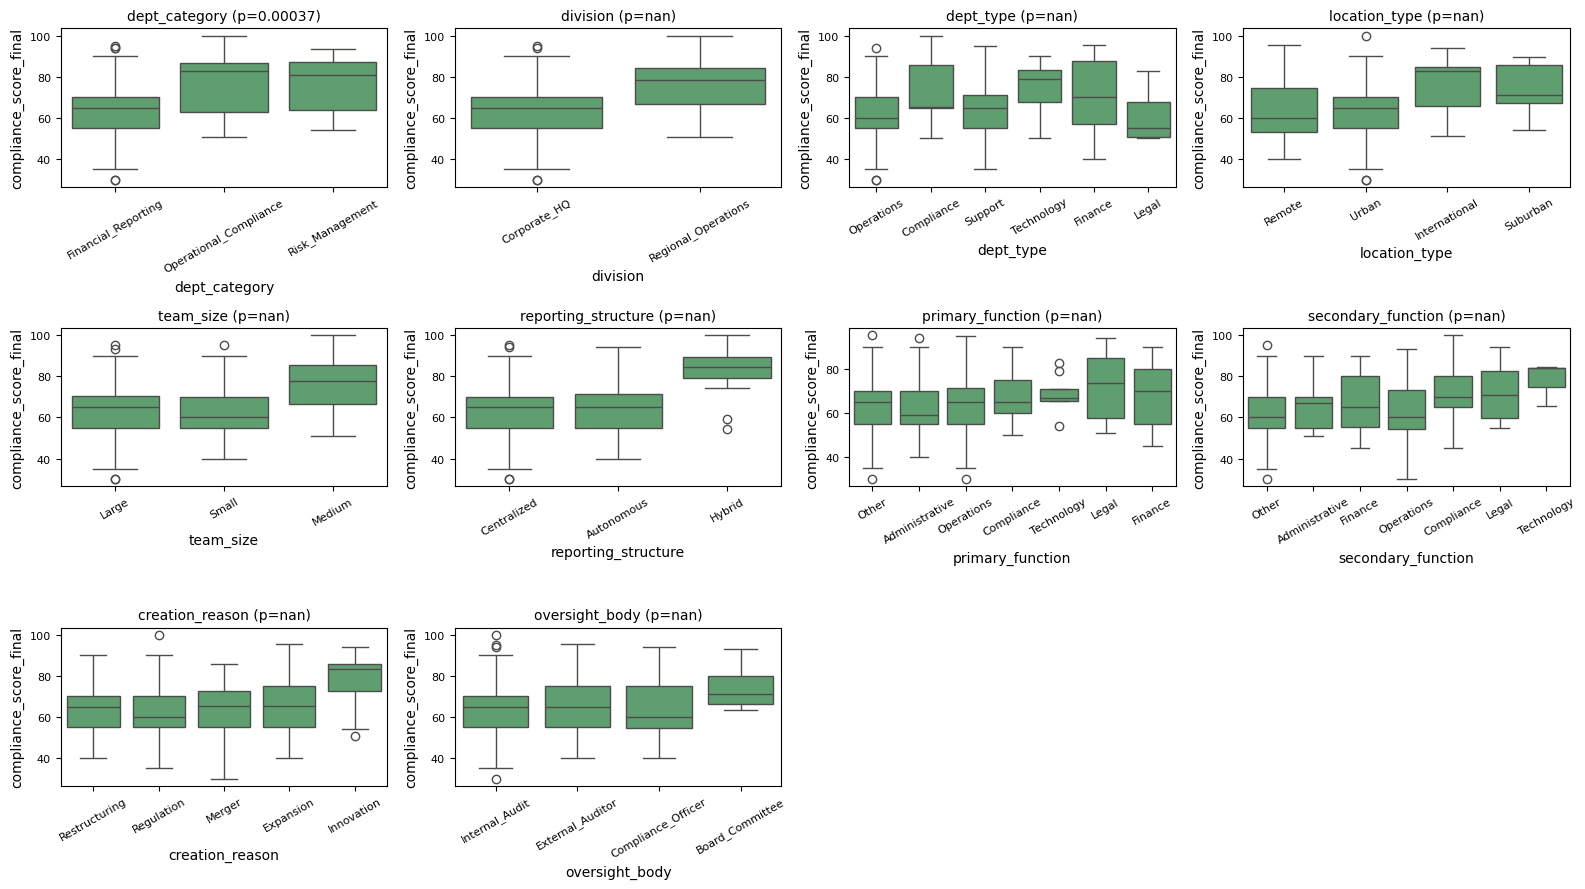

In [1109]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import kruskal

target = "compliance_score_final"
categorical_cols = [
    "dept_category", "division", "dept_type", "location_type",
    "team_size", "reporting_structure", "primary_function",
    "secondary_function", "creation_reason", "oversight_body"
]

n_cols = 4  # plots per row
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
axes = axes.flatten()

for i, cat_col in enumerate(categorical_cols):
    if cat_col not in departments_clean.columns:
        continue
    
    # Compute Kruskal-Wallis p-value
    groups = [departments_clean[departments_clean[cat_col]==lvl][target].dropna()
              for lvl in departments_clean[cat_col].unique()]
    if len(groups) > 1:  # need at least 2 groups
        stat, p = kruskal(*groups)
        p_text = f"p={p:.5f}"
    else:
        p_text = "p=N/A"
    
    # Boxplot
    sns.boxplot(
        x=cat_col,
        y=target,
        data=departments_clean,
        color=sns.color_palette("deep")[2],  # deep seaborn color
        ax=axes[i]
    )
    
    axes[i].tick_params(axis='x', rotation=30, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
    axes[i].set_title(f"{cat_col} ({p_text})", fontsize=10)

# Remove empty axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()